# An Analysis of Relationship Between Sales of Antihistamine Drugs and Seasonal Pollen Counts

## About Data

###  Sales Data
The dataset is built from the initial dataset consisted of 600000 transactional data collected in 6 years (period 2014-2019), indicating date and time of sale, pharmaceutical drug brand name and sold quantity, exported from Point-of-Sale system in the individual pharmacy. Selected group of drugs from the dataset (57 drugs) is classified to the following Anatomical Therapeutic Chemical (ATC) Classification System categories:

    M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances
    M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives
    N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives
    N02BE/B - Other analgesics and antipyretics, Pyrazolones and Anilides
    N05B - Psycholeptics drugs, Anxiolytic drugs
    N05C - Psycholeptics drugs, Hypnotics and sedatives drugs
    R03 - Drugs for obstructive airway diseases
    R06 - Antihistamines for systemic use
    Sales data are resampled to the hourly, daily, weekly and monthly periods. Data is already pre-processed, where processing included outlier detection and treatment and missing data imputation.

Location of Data Collection: Retail drug store in Niš, Serbia
Time Period: 2014 - 2019
Frequency: Hourly, Daily, Weekly, Monthly

Citation: Milan Zdravković. (2020). <i>Pharma sales data</i> [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DS/466126


### Pollen Data
Pollen data is produced from Ambee's pollen model for Nis, Serbia. The data contains species wise pollen count as well as overall Tree, Grass and Weed pollen counts along with their risk level from 2016-2019. The model uses meterological and phenological information to predict pollen counts.

Location of Data: Nis, Serbia
Time Period: 2016 - 2019
Frequency: Daily

http://dx.doi.org/10.13140/RG.2.2.15181.61922

<div style="page-break-after: always"></div>

# Initial EDA and Analysis of Daily Data

In [1]:
%load_ext nb_black
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import scienceplots
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

plt.style.use(["science"])

<IPython.core.display.Javascript object>

In [2]:
sales = pd.read_csv("salesdaily.csv")
pollen = pd.read_csv("Nis_Serbia_Pollen.csv")

<IPython.core.display.Javascript object>

In [3]:
sales["City"] = "Nis, Serbia"

<IPython.core.display.Javascript object>

In [4]:
sales.head()

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name         City  
0   248     Thursday  Nis, Serbia  
1   276       Friday  Nis, Serbia  
2   276     Saturday  Nis, Serbia  
3   276       Sunday  Nis, Serbia  
4   276       Monday  Nis, Serbia

<IPython.core.display.Javascript object>

In [5]:
# We are interested in Antihistamine drugs, so filtering out R06
sales["datum"] = pd.to_datetime(sales["datum"])
sales = sales[["datum", "R06"]]
sales = sales.set_index("datum")
sales.head()

R06
datum          
2014-01-02  2.0
2014-01-03  4.0
2014-01-04  1.0
2014-01-05  0.0
2014-01-06  2.0

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Trendline for Daily Antihistamine Drug Sales')

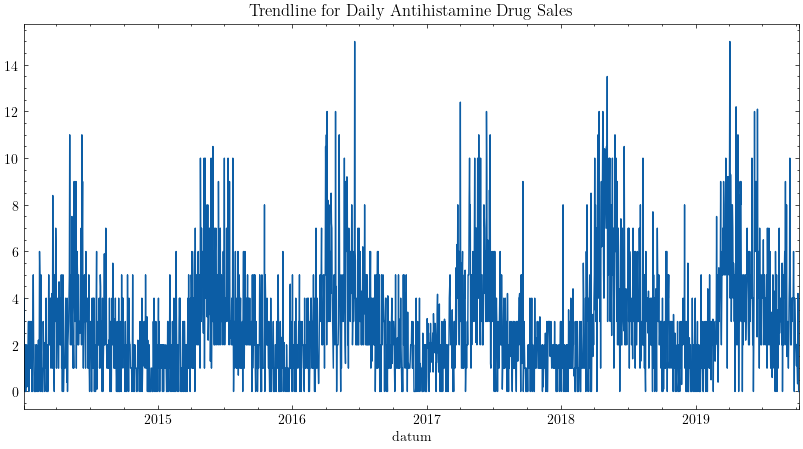

<IPython.core.display.Javascript object>

In [6]:
ax = sales["R06"].plot(figsize=(10, 5))
plt.title("Trendline for Daily Antihistamine Drug Sales")

In [7]:
display(sales.describe())

R06
count  2106.000000
mean      2.900198
std       2.415816
min       0.000000
25%       1.000000
50%       2.000000
75%       4.000000
max      15.000000

<IPython.core.display.Javascript object>

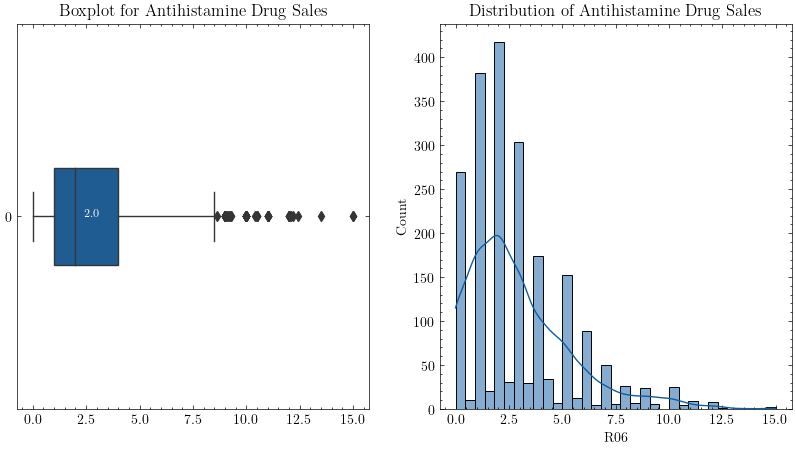

<IPython.core.display.Javascript object>

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
boxplot = sns.boxplot(sales["R06"], ax=ax1, width=0.25, orient="h")
boxplot.text(
    x=sales["R06"].median() + 0.75,
    y=0,
    s=str(sales["R06"].median()),
    horizontalalignment="center",
    size="small",
    color="w",
    weight="bold",
)
ax1.title.set_text("Boxplot for Antihistamine Drug Sales")
histogram = sns.histplot(sales["R06"], ax=ax2, kde=True)
ax2.title.set_text("Distribution of Antihistamine Drug Sales")
plt.show()

In [9]:
sales["R06"].sum()

6107.8175

<IPython.core.display.Javascript object>

In [10]:
pollen.head()

lat        lng            createdAt  treeCount  grassCount  \
0  43.321119  21.895361  2016-01-01 00:00:00          2           0   
1  43.321119  21.895361  2016-01-02 00:00:00         19           0   
2  43.321119  21.895361  2016-01-03 00:00:00        158           0   
3  43.321119  21.895361  2016-01-04 00:00:00         30           0   
4  43.321119  21.895361  2016-01-05 00:00:00         41           0   

   weedCount  treeRisk grassRisk weedRisk  data_species_weed_Mugwort  ...  \
0          0       Low       Low      Low                        0.0  ...   
1          0       Low       Low      Low                        0.0  ...   
2          0  Moderate       Low      Low                        0.0  ...   
3          0       Low       Low      Low                        0.0  ...   
4          0       Low       Low      Low                        0.0  ...   

   data_species_weed_Sedges  data_species_weed_Aster  \
0                       NaN                      NaN   
1                       NaN                      NaN   
2                       NaN                      NaN   
3                       NaN                      NaN   
4                       NaN                      NaN   

   data_species_weed_Plantago  data_species_weed_Rumex  \
0                         NaN                      NaN   
1                         NaN                      NaN   
2                         NaN                      NaN   
3                         NaN                      NaN   
4                         NaN                      NaN   

   data_species_tree_Casuarina  data_species_tree_Acacia  \
0                          NaN                       NaN   
1                          NaN                       NaN   
2                          NaN                       NaN   
3                          NaN                       NaN   
4                          NaN                       NaN   

   data_species_tree_Myrtaceae  data_species_tree_Willow  \
0                          NaN                       NaN   
1                          NaN                       NaN   
2                          NaN                       NaN   
3                          NaN                       NaN   
4                          NaN                       NaN   

   data_species_tree_Olive  data_species_grass_Grass_Poaceae  
0                      NaN                               0.0  
1                      NaN                               0.0  
2                      NaN                               0.0  
3                      NaN                               0.0  
4                      NaN                               0.0  

[5 rows x 37 columns]

<IPython.core.display.Javascript object>

In [11]:
pollen["createdAt"] = pd.to_datetime(pollen["createdAt"])
pollen = pollen.set_index("createdAt")

<IPython.core.display.Javascript object>

In [12]:
pollen["totalCount"] = pollen["treeCount"] + pollen["grassCount"] + pollen["weedCount"]

<IPython.core.display.Javascript object>

In [13]:
pollen[["totalCount"]].describe()

totalCount
count  1461.000000
mean    133.078713
std     130.180996
min       0.000000
25%      29.000000
50%      96.000000
75%     198.000000
max     978.000000

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Trendline for Daily Tree Pollen Count')

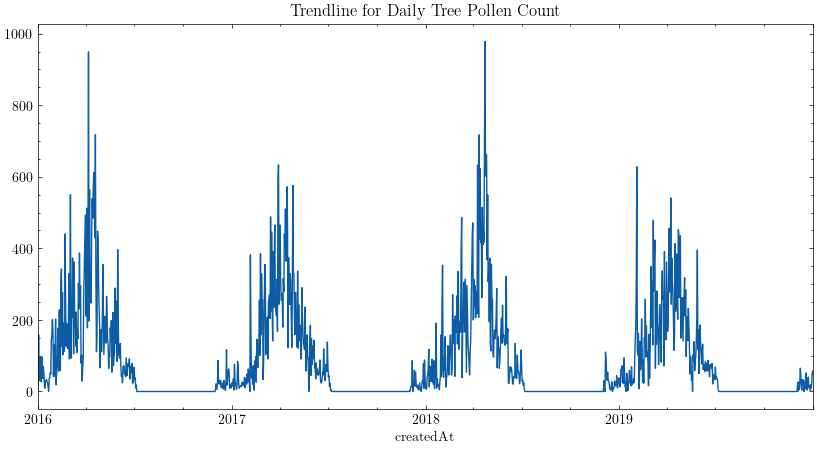

<IPython.core.display.Javascript object>

In [14]:
pollen["treeCount"].plot(figsize=(10, 5))
plt.title("Trendline for Daily Tree Pollen Count")

Text(0.5, 1.0, 'Trendline for Daily Grass Pollen Count')

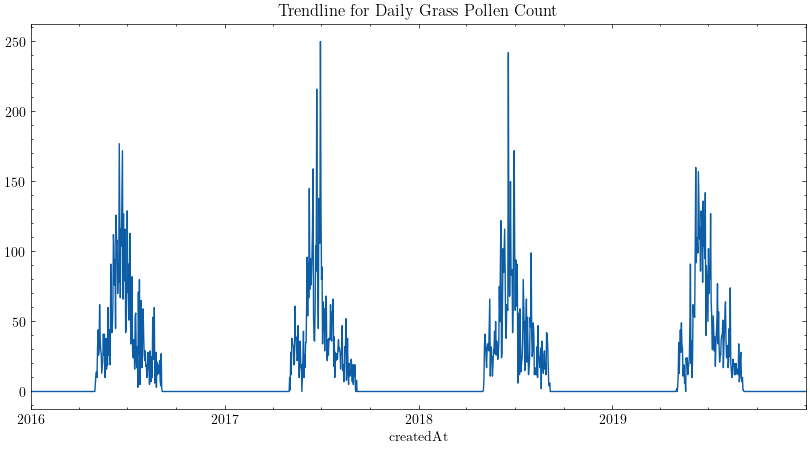

<IPython.core.display.Javascript object>

In [15]:
pollen["grassCount"].plot(figsize=(10, 5))
plt.title("Trendline for Daily Grass Pollen Count")

Text(0.5, 1.0, 'Trendline for Daily Weed Pollen Count')

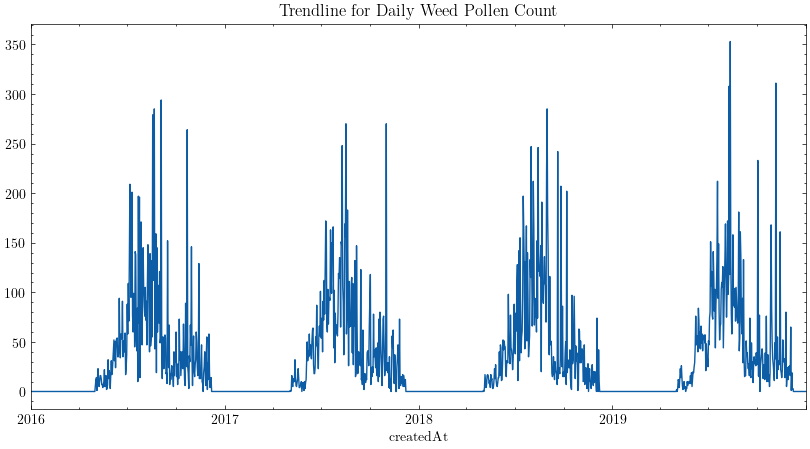

<IPython.core.display.Javascript object>

In [16]:
pollen["weedCount"].plot(figsize=(10, 5))
plt.title("Trendline for Daily Weed Pollen Count")

Text(0.5, 1.0, 'Trendline for Daily Total Pollen Count')

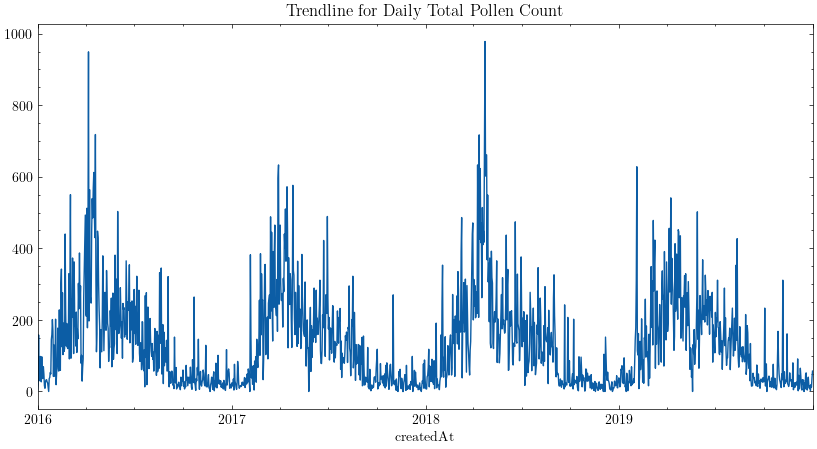

<IPython.core.display.Javascript object>

In [17]:
pollen["totalCount"].plot(figsize=(10, 5))
plt.title("Trendline for Daily Total Pollen Count")

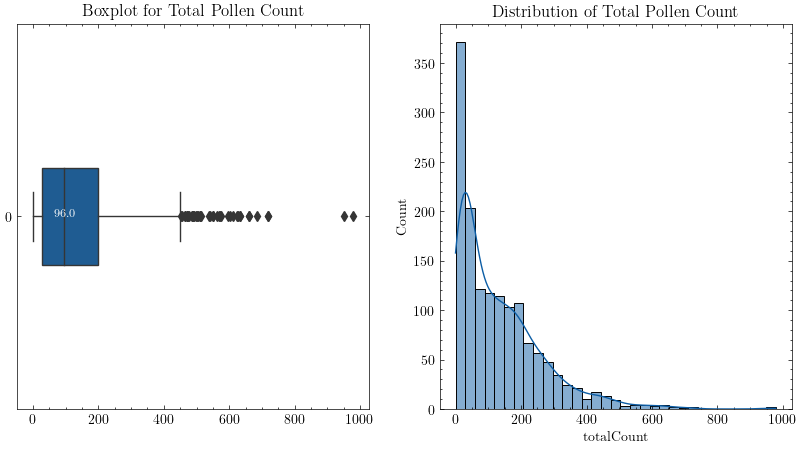

<IPython.core.display.Javascript object>

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
boxplot = sns.boxplot(pollen["totalCount"], ax=ax1, width=0.25, orient="h")
boxplot.text(
    x=pollen["totalCount"].median() + 0.75,
    y=0,
    s=str(pollen["totalCount"].median()),
    horizontalalignment="center",
    size="small",
    color="w",
    weight="bold",
)
ax1.title.set_text("Boxplot for Total Pollen Count")
histogram = sns.histplot(pollen["totalCount"], ax=ax2, kde=True)
ax2.title.set_text("Distribution of Total Pollen Count")
plt.show()

In [19]:
merged_data = pd.merge(sales, pollen, left_index=True, right_index=True)
merged_data.head()
subset = merged_data[["R06", "treeCount", "grassCount", "weedCount", "totalCount"]]

<IPython.core.display.Javascript object>

In [20]:
normalized_subset = (subset - subset.min()) / (subset.max() - subset.min())

<IPython.core.display.Javascript object>

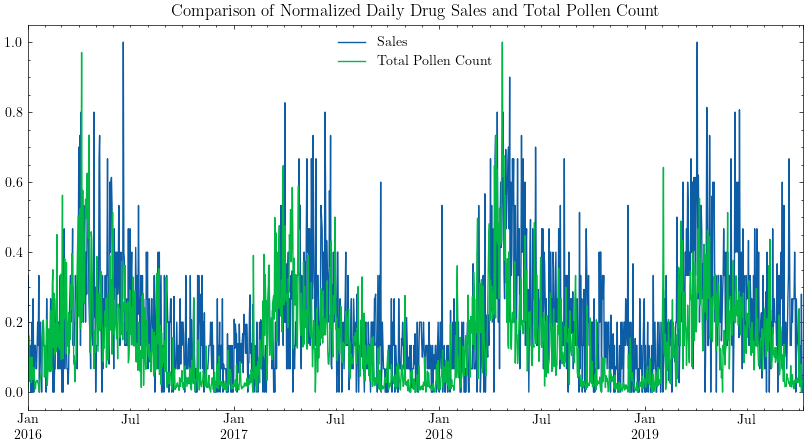

<IPython.core.display.Javascript object>

In [21]:
normalized_subset["R06"].plot(figsize=(10, 5), label="Sales")
normalized_subset["totalCount"].plot(figsize=(10, 5), label="Total Pollen Count")
plt.title("Comparison of Normalized Daily Drug Sales and Total Pollen Count")
plt.legend()

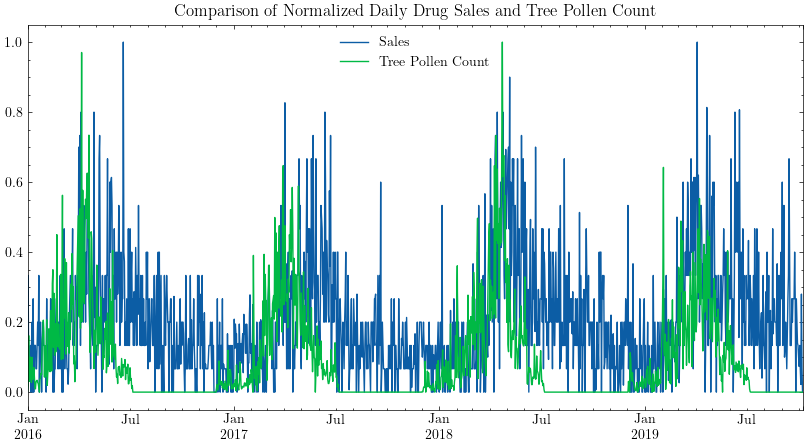

<IPython.core.display.Javascript object>

In [22]:
normalized_subset["R06"].plot(figsize=(10, 5), label="Sales")
normalized_subset["treeCount"].plot(figsize=(10, 5), label="Tree Pollen Count")
plt.title("Comparison of Normalized Daily Drug Sales and Tree Pollen Count")
plt.legend()

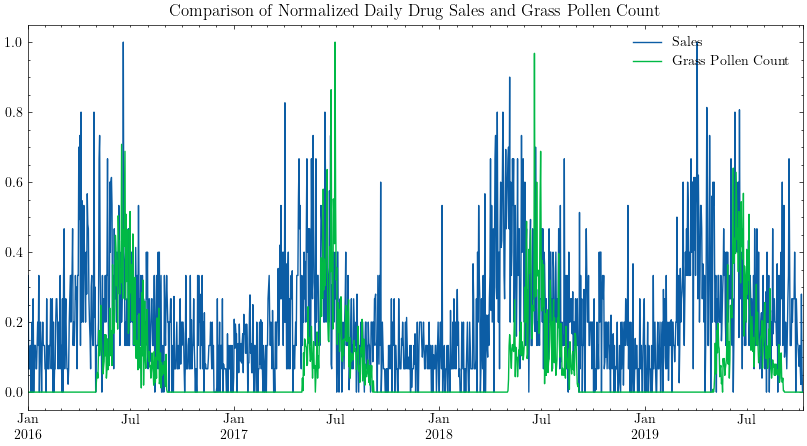

<IPython.core.display.Javascript object>

In [23]:
normalized_subset["R06"].plot(figsize=(10, 5), label="Sales")
normalized_subset["grassCount"].plot(figsize=(10, 5), label="Grass Pollen Count")
plt.title("Comparison of Normalized Daily Drug Sales and Grass Pollen Count")
plt.legend()

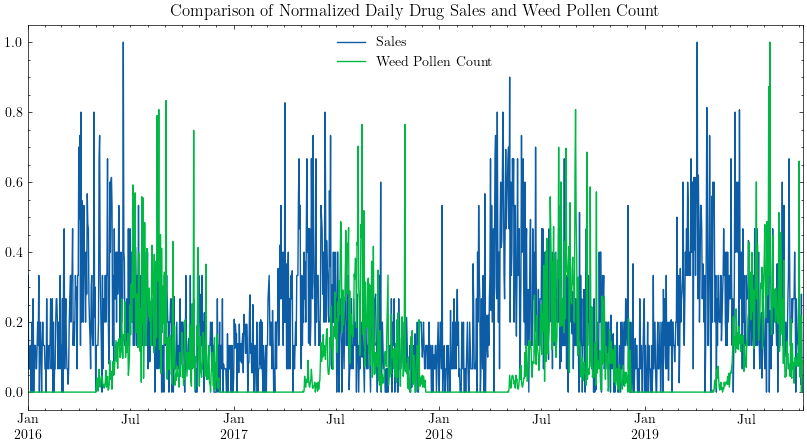

<IPython.core.display.Javascript object>

In [24]:
normalized_subset["R06"].plot(figsize=(10, 5), label="Sales")
normalized_subset["weedCount"].plot(figsize=(10, 5), label="Weed Pollen Count")
plt.title("Comparison of Normalized Daily Drug Sales and Weed Pollen Count")
plt.legend()

In [25]:
display(subset.corr(method="spearman"))

R06  treeCount  grassCount  weedCount  totalCount
R06         1.000000   0.271183    0.316217   0.081401    0.412610
treeCount   0.271183   1.000000   -0.098147  -0.653180    0.658268
grassCount  0.316217  -0.098147    1.000000   0.672866    0.408139
weedCount   0.081401  -0.653180    0.672866   1.000000    0.064992
totalCount  0.412610   0.658268    0.408139   0.064992    1.000000

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Relation between Daily Antihistamine Drug Sales and Total Pollen Count')

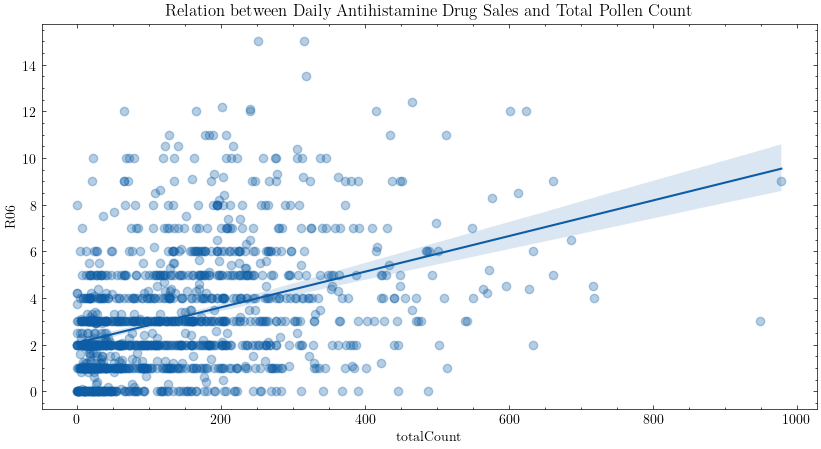

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(10, 5))
sns.regplot(x=subset["totalCount"], y=subset["R06"], scatter_kws={"alpha": 0.3})
plt.title("Relation between Daily Antihistamine Drug Sales and Total Pollen Count")

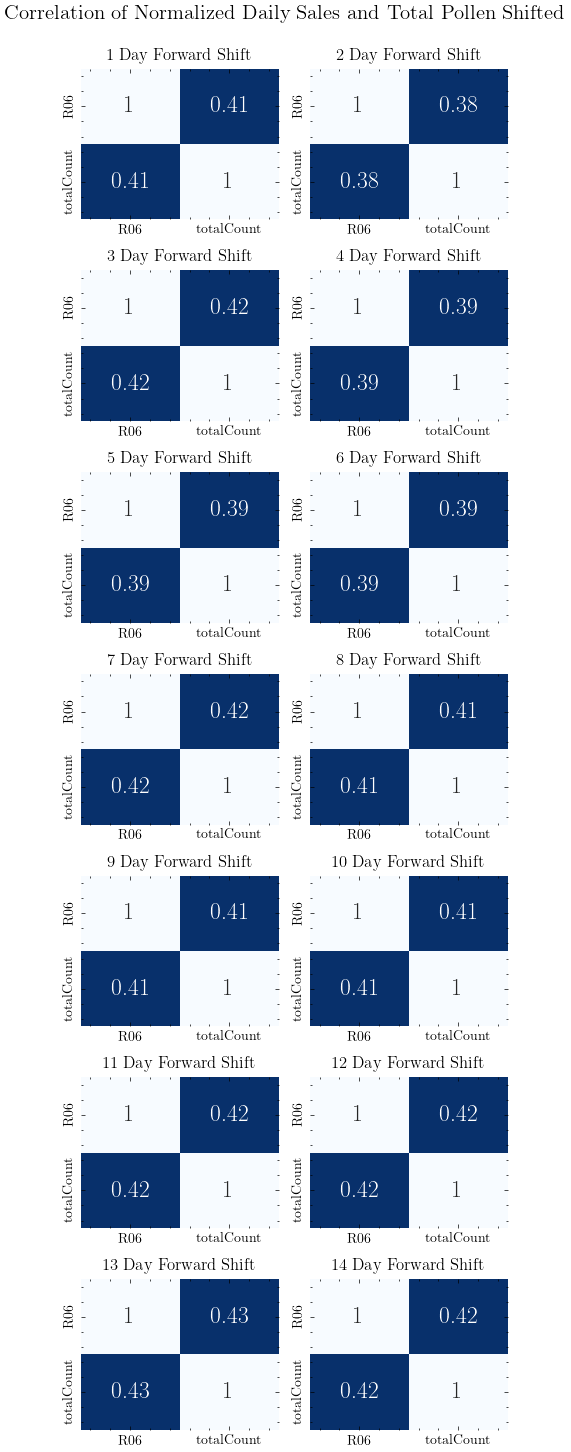

<IPython.core.display.Javascript object>

In [27]:
fig, axes = plt.subplots(7, 2, figsize=(5, 15))
for i in range(1, 15):
    if i % 2 != 0:
        ax = axes[max((i - 1) // 2, 0), 0]
    else:
        ax = axes[(i - 1) // 2, 1]
    temp = normalized_subset.copy()
    temp["totalCount"] = temp["totalCount"].shift(i)
    sns.heatmap(
        temp[["R06", "totalCount"]].corr(method="spearman"),
        ax=ax,
        annot=True,
        cbar=False,
        cmap="Blues_r",
        annot_kws={"fontsize": 17},
    )
    ax.title.set_text(str(i) + " Day Forward Shift")
# fig.delaxes(axes[-1, -1])
fig.suptitle(
    "Correlation of Normalized Daily Sales and Total Pollen Shifted", fontsize=15
)
fig.tight_layout(pad=2, w_pad=1.0, h_pad=1.0)
plt.show()

## Takeaways

1. We see similar overall trends
2. The correlation is moderate at 40%
3. Out of Tree, Grass and Weed, Tree has the highest correlation followed by Grass.
4. Shifting the pollen count by upto 14 days didn't change correlation too much.
5. Both Sales as well as Pollen have high variance in at daily level
<div style="page-break-after: always"></div>

# Analysis of Weekly Data

In [28]:
subset_weekly = subset.resample("W").sum()

<IPython.core.display.Javascript object>

In [29]:
display(subset_weekly.corr(method="spearman"))

R06  treeCount  grassCount  weedCount  totalCount
R06         1.000000   0.412527    0.499926   0.132132    0.691549
treeCount   0.412527   1.000000   -0.123394  -0.718500    0.712594
grassCount  0.499926  -0.123394    1.000000   0.668526    0.378842
weedCount   0.132132  -0.718500    0.668526   1.000000   -0.068394
totalCount  0.691549   0.712594    0.378842  -0.068394    1.000000

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Trendline for Weekly Antihistamine Drug Sales')

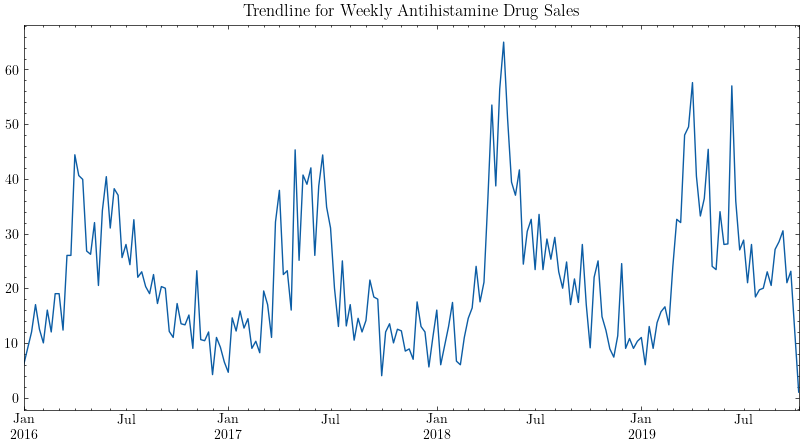

<IPython.core.display.Javascript object>

In [30]:
subset_weekly["R06"].plot(figsize=(10, 5))
plt.title("Trendline for Weekly Antihistamine Drug Sales")

Text(0.5, 1.0, 'Trendline for Weekly Total Pollen Count')

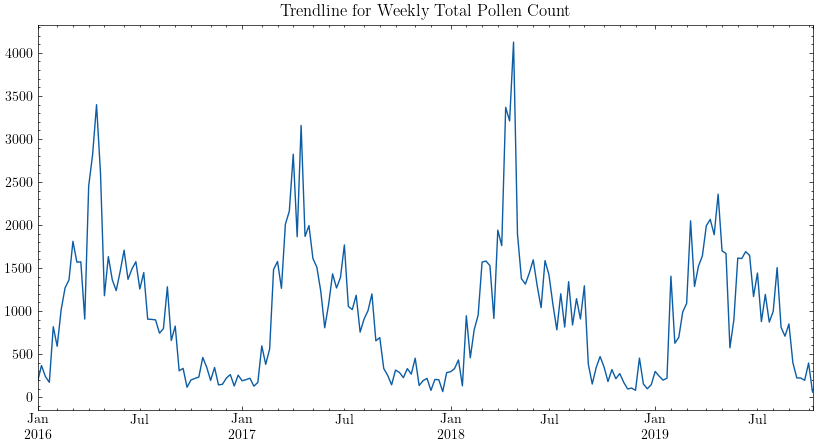

<IPython.core.display.Javascript object>

In [31]:
subset_weekly["totalCount"].plot(figsize=(10, 5))
plt.title("Trendline for Weekly Total Pollen Count")

Text(0.5, 1.0, 'Trendline for Weekly Tree Pollen Count')

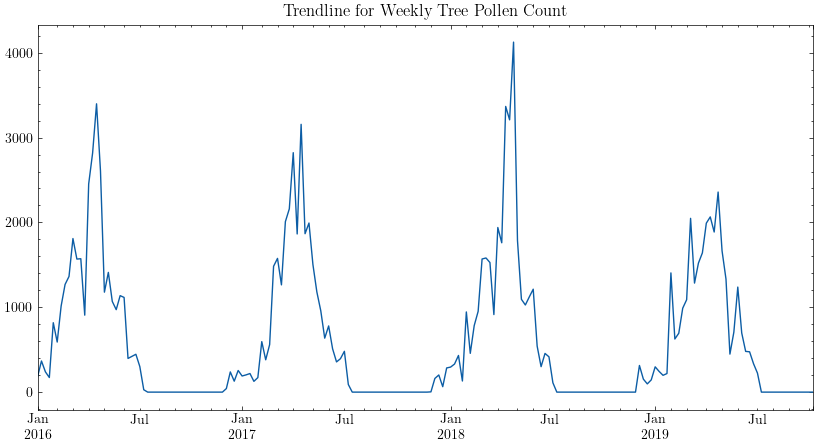

<IPython.core.display.Javascript object>

In [32]:
subset_weekly["treeCount"].plot(figsize=(10, 5))
plt.title("Trendline for Weekly Tree Pollen Count")

Text(0.5, 1.0, 'Trendline for Weekly Grass Pollen Count')

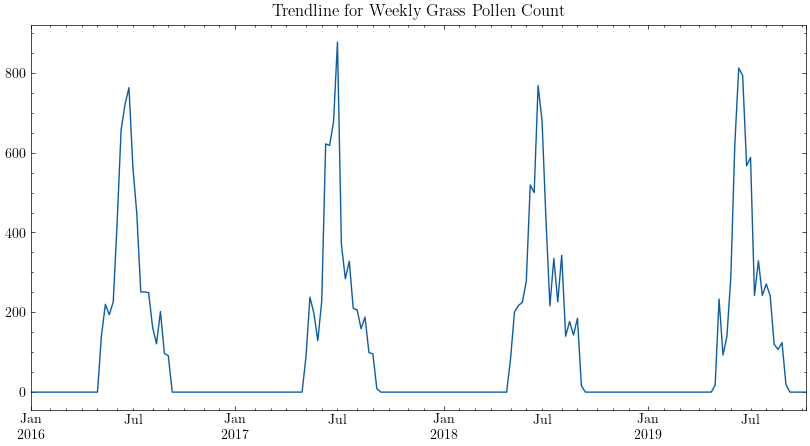

<IPython.core.display.Javascript object>

In [33]:
subset_weekly["grassCount"].plot(figsize=(10, 5))
plt.title("Trendline for Weekly Grass Pollen Count")

Text(0.5, 1.0, 'Trendline for Weekly Weed Pollen Count')

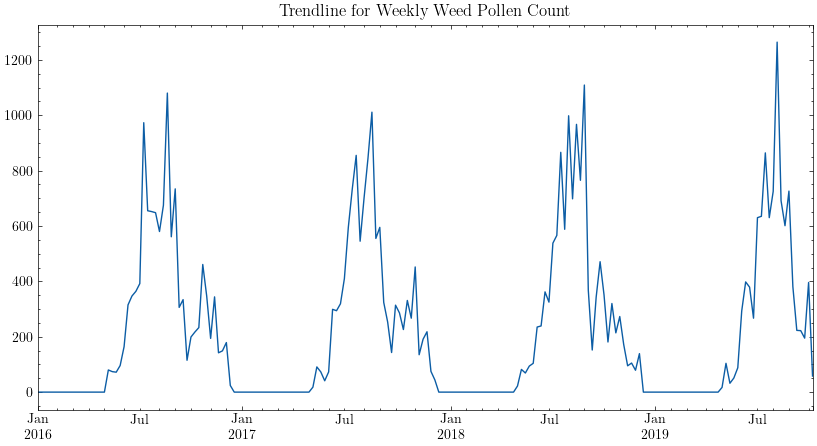

<IPython.core.display.Javascript object>

In [34]:
subset_weekly["weedCount"].plot(figsize=(10, 5))
plt.title("Trendline for Weekly Weed Pollen Count")

Text(0.5, 1.0, 'Relation between Weekly Antihistamine Drug Sales and Total Pollen Count')

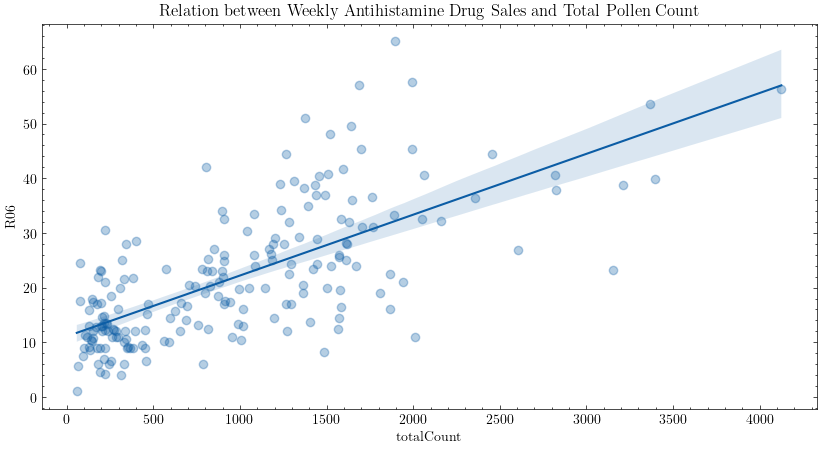

<IPython.core.display.Javascript object>

In [35]:
plt.figure(figsize=(10, 5))
sns.regplot(
    x=subset_weekly["totalCount"], y=subset_weekly["R06"], scatter_kws={"alpha": 0.3}
)
plt.title("Relation between Weekly Antihistamine Drug Sales and Total Pollen Count")

In [36]:
normalized_subset_weekly = (subset_weekly - subset_weekly.min()) / (
    subset_weekly.max() - subset_weekly.min()
)

<IPython.core.display.Javascript object>

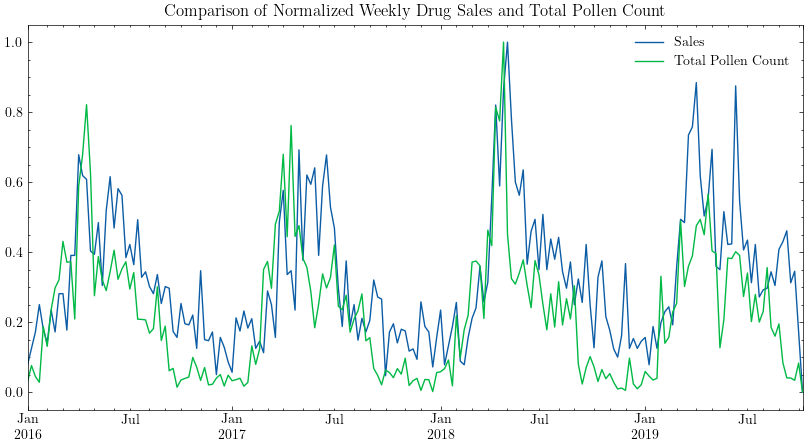

<IPython.core.display.Javascript object>

In [37]:
normalized_subset_weekly["R06"].plot(figsize=(10, 5), label="Sales")
normalized_subset_weekly["totalCount"].plot(figsize=(10, 5), label="Total Pollen Count")
plt.title("Comparison of Normalized Weekly Drug Sales and Total Pollen Count")
plt.legend()

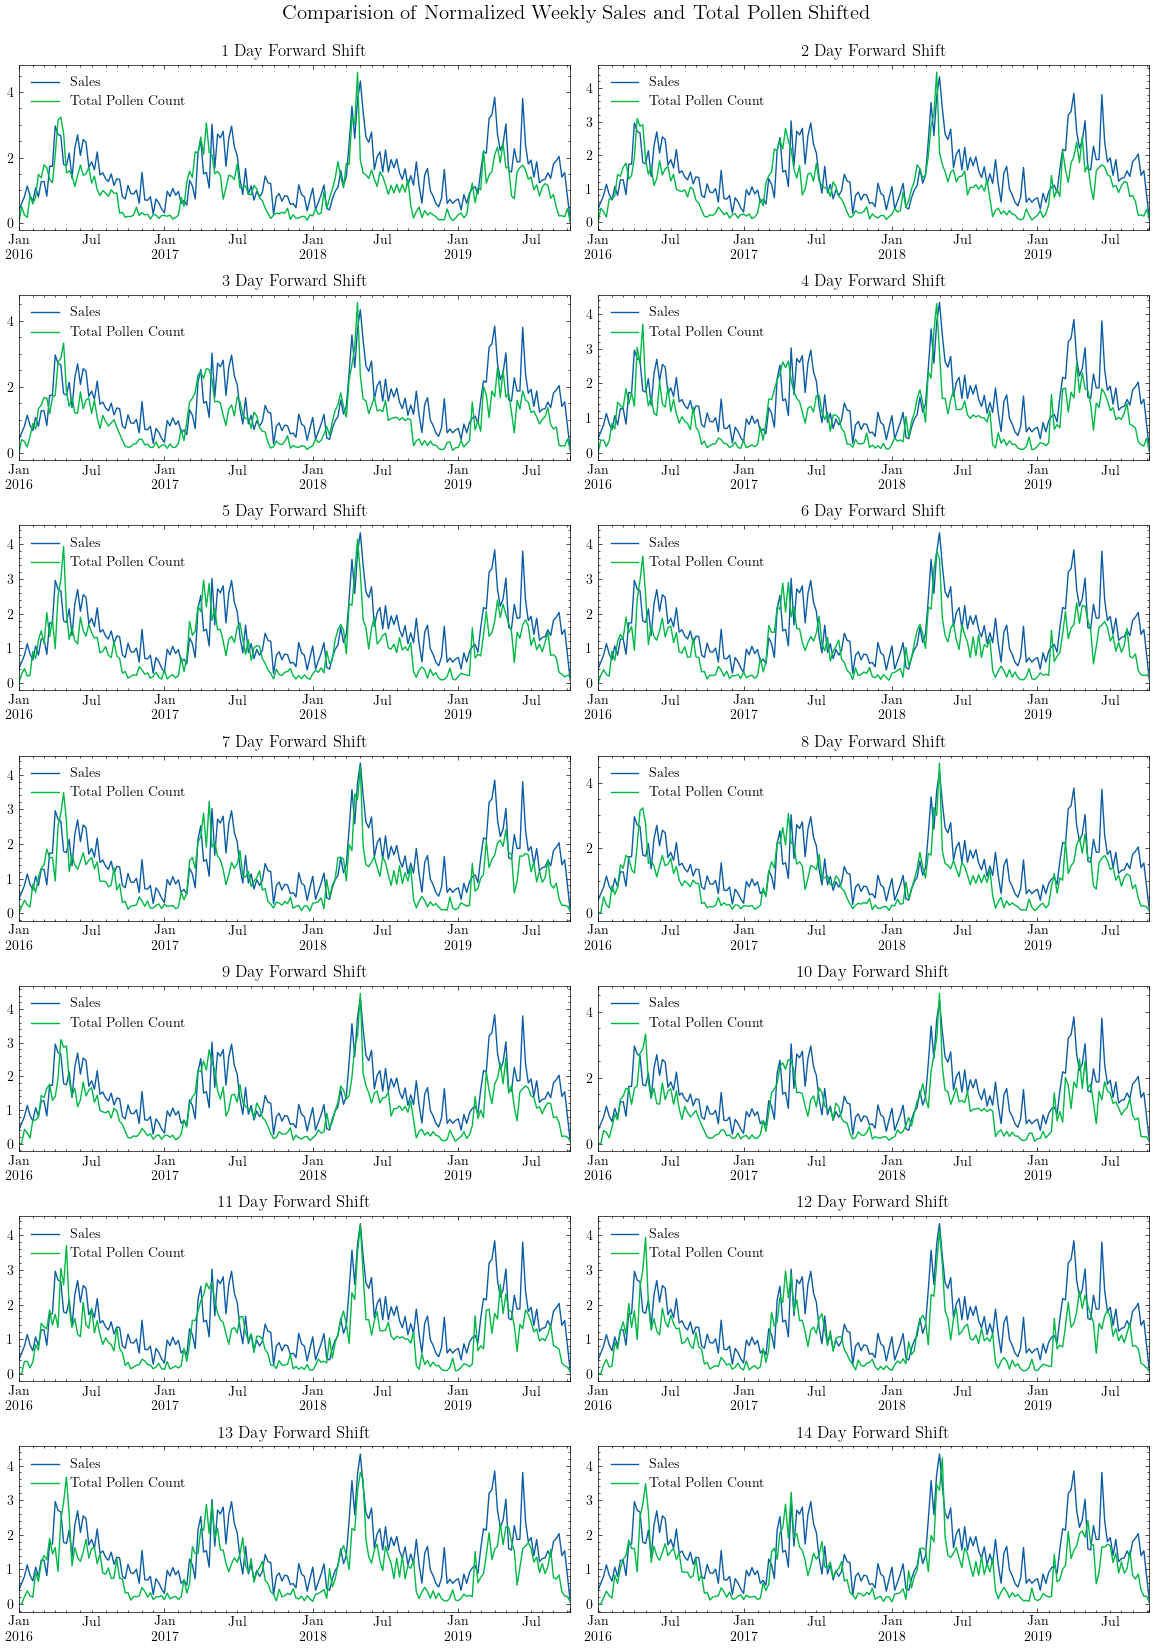

<IPython.core.display.Javascript object>

In [38]:
fig, axes = plt.subplots(7, 2, figsize=(12, 17))
for i in range(1, 15):
    if i % 2 != 0:
        ax = axes[max((i - 1) // 2, 0), 0]
    else:
        ax = axes[(i - 1) // 2, 1]
    temp = normalized_subset.copy()
    temp["totalCount"] = temp["totalCount"].shift(i)
    temp = temp.resample("W").sum()
    temp["R06"].plot(label="Sales", ax=ax)
    temp["totalCount"].plot(label="Total Pollen Count", ax=ax)
    ax.legend()
    ax.title.set_text(str(i) + " Day Forward Shift")
# fig.delaxes(axes[-1, -1])
fig.suptitle(
    "Comparision of Normalized Weekly Sales and Total Pollen Shifted", fontsize=15
)
fig.tight_layout(pad=2, w_pad=1.0, h_pad=1.0)
plt.show()

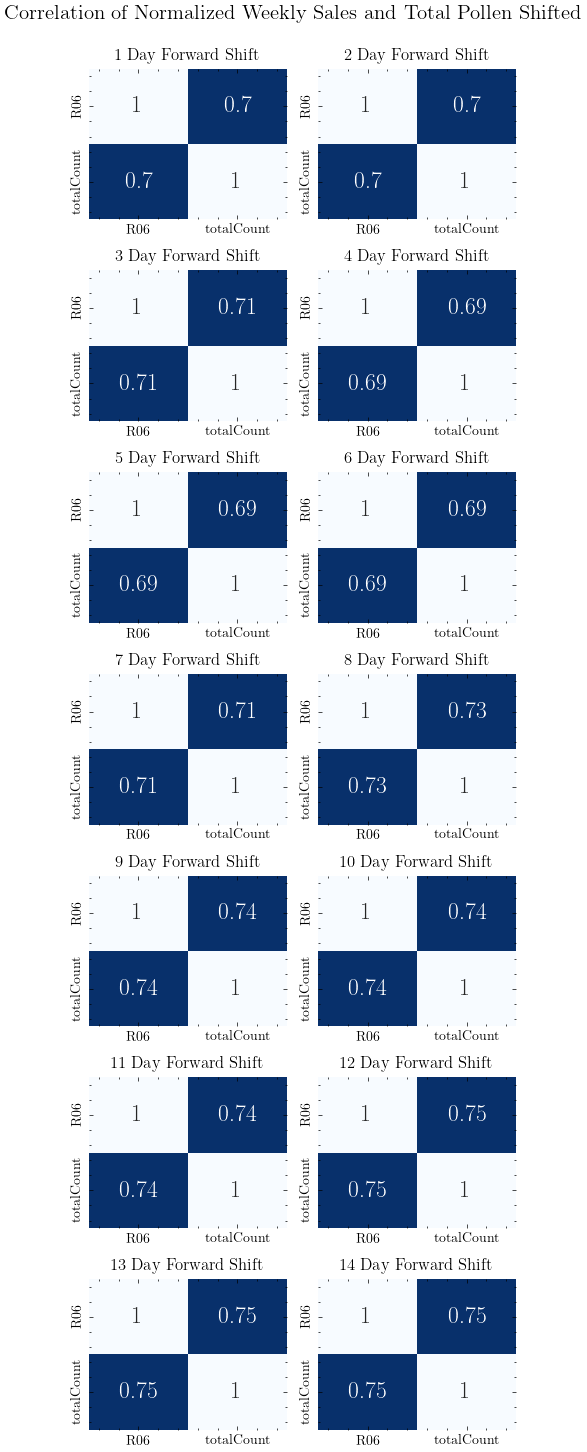

<IPython.core.display.Javascript object>

In [39]:
fig, axes = plt.subplots(7, 2, figsize=(5, 15))
for i in range(1, 15):
    if i % 2 != 0:
        ax = axes[max((i - 1) // 2, 0), 0]
    else:
        ax = axes[(i - 1) // 2, 1]
    temp = normalized_subset.copy()
    temp["totalCount"] = temp["totalCount"].shift(i)
    temp = temp.resample("W").sum()
    sns.heatmap(
        temp[["R06", "totalCount"]].corr(method="spearman"),
        ax=ax,
        annot=True,
        cbar=False,
        cmap="Blues_r",
        annot_kws={"fontsize": 17},
    )
    ax.title.set_text(str(i) + " Day Forward Shift")
# fig.delaxes(axes[-1, -1])
fig.suptitle(
    "Correlation of Normalized Weekly Sales and Total Pollen Shifted", fontsize=15
)
fig.tight_layout(pad=2, w_pad=1.0, h_pad=1.0)
plt.show()

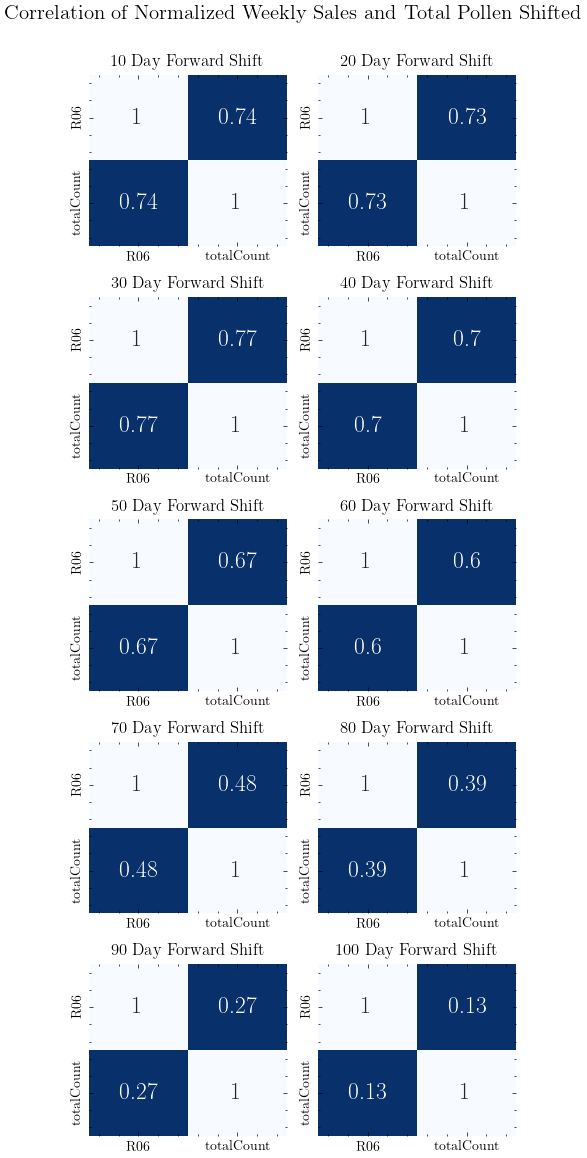

<IPython.core.display.Javascript object>

In [40]:
fig, axes = plt.subplots(5, 2, figsize=(5, 12))
for i in range(10, 101, 10):
    j = i // 10
    if j % 2 != 0:
        ax = axes[max((j - 1) // 2, 0), 0]
    else:
        ax = axes[(j - 1) // 2, 1]
    temp = normalized_subset.copy()
    temp["totalCount"] = temp["totalCount"].shift(i)
    temp = temp.resample("W").sum()
    sns.heatmap(
        temp[["R06", "totalCount"]].corr(method="spearman"),
        ax=ax,
        annot=True,
        cbar=False,
        cmap="Blues_r",
        annot_kws={"fontsize": 17},
    )
    ax.title.set_text(str(i) + " Day Forward Shift")
# fig.delaxes(axes[-1, -1])
fig.suptitle(
    "Correlation of Normalized Weekly Sales and Total Pollen Shifted", fontsize=15
)
fig.tight_layout(pad=2, w_pad=1.0, h_pad=1.0)
plt.show()

In [41]:
weekly_average = subset.copy()
weekly_average["week"] = weekly_average.index.isocalendar().week.astype(int)
weekly_average = weekly_average.groupby("week").mean().reset_index()

<IPython.core.display.Javascript object>

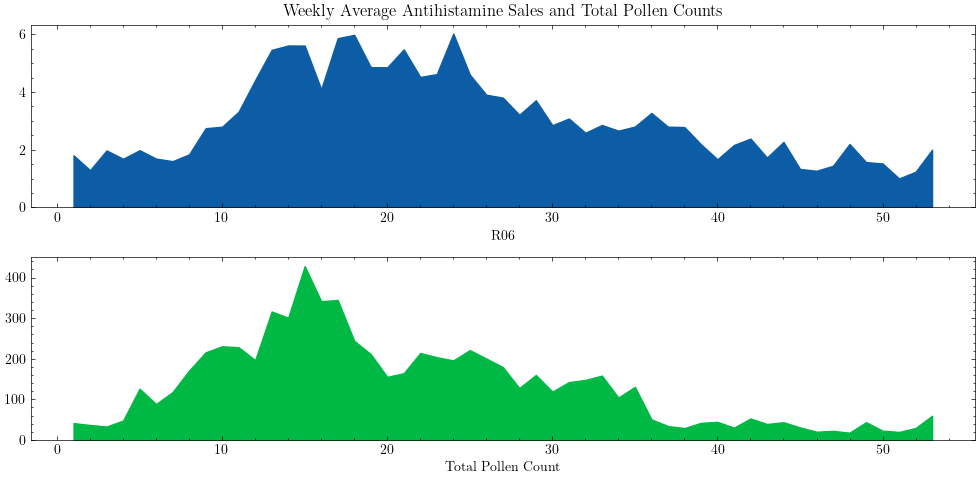

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(10, 5))
ax = plt.subplot(2, 1, 1)
plt.title("Weekly Average Antihistamine Sales and Total Pollen Counts")
plt.xlabel("R06")
ax = plt.stackplot(weekly_average["week"], weekly_average["R06"], color="#0C5DA5")
ax = plt.subplot(2, 1, 2)
plt.xlabel("Total Pollen Count")
ax = plt.stackplot(
    weekly_average["week"], weekly_average["totalCount"], color="#00B945"
)
plt.tight_layout()

## Takeaways

1. Resampling the data to weekly and taking the sum reduced a lot of noise in the data and smoothened it out
2. We saw a significant improvement in correlation from 40% Daily to 69% Weekly, this is mainly because randomness in daily data is reduced
3. Interestingly, After shifting the pollen data by 8 days(1 week) and taking weekly sum, the correlation started to increase. This might suggest that current pollen might affect the sales of antihistamines of 8 days later more than current day's. Although the increase in correlation was not very high at 3%.
4. The pollen count was shifted upto 100 days and weekly sum was taken with a 10 day interval between each shift. 10 day shift sales had higher correlation to today's pollen but the correlation started to gradually decline from 20 day shift and started rapidly declining from 60 day shift.
5. Both the sales of Antihistamines and Pollen peak between 10th week to 30th week. While pollen sharply declines after 30th week, the sales of antihistamines declines gradually

<div style="page-break-after: always"></div>

# Analysis of Monthly Data

In [43]:
subset_monthly = subset.resample("M").sum()

<IPython.core.display.Javascript object>

In [44]:
display(subset_monthly.corr(method="spearman"))

R06  treeCount  grassCount  weedCount  totalCount
R06         1.000000   0.509461    0.521075   0.091234    0.817206
treeCount   0.509461   1.000000   -0.144971  -0.719210    0.751606
grassCount  0.521075  -0.144971    1.000000   0.714635    0.310846
weedCount   0.091234  -0.719210    0.714635   1.000000   -0.156697
totalCount  0.817206   0.751606    0.310846  -0.156697    1.000000

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Trendline for Monthly Antihistamine Drug Sales')

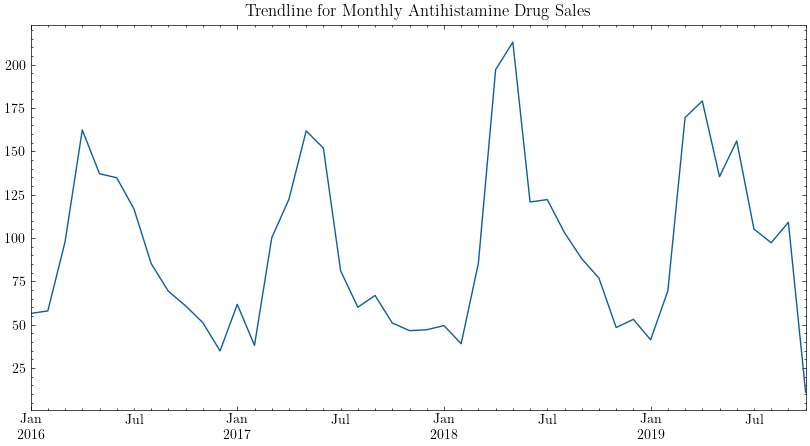

<IPython.core.display.Javascript object>

In [45]:
subset_monthly["R06"].plot(figsize=(10, 5))
plt.title("Trendline for Monthly Antihistamine Drug Sales")

Text(0.5, 1.0, 'Trendline for Monthly Total Pollen Count')

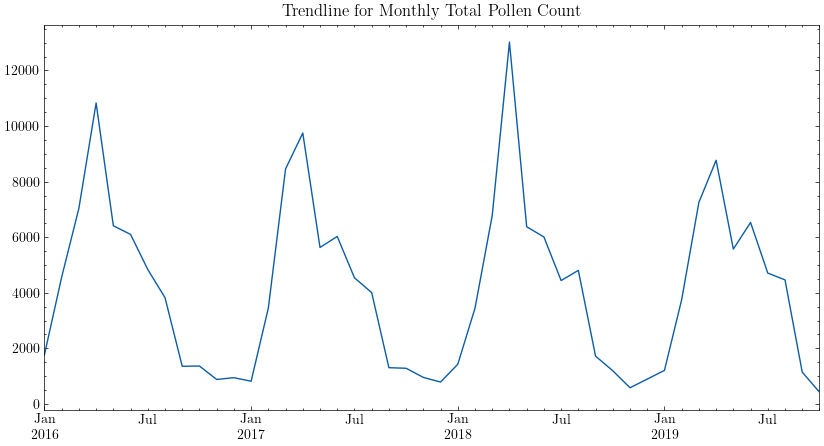

<IPython.core.display.Javascript object>

In [46]:
subset_monthly["totalCount"].plot(figsize=(10, 5))
plt.title("Trendline for Monthly Total Pollen Count")

Text(0.5, 1.0, 'Trendline for Monthly Tree Pollen Count')

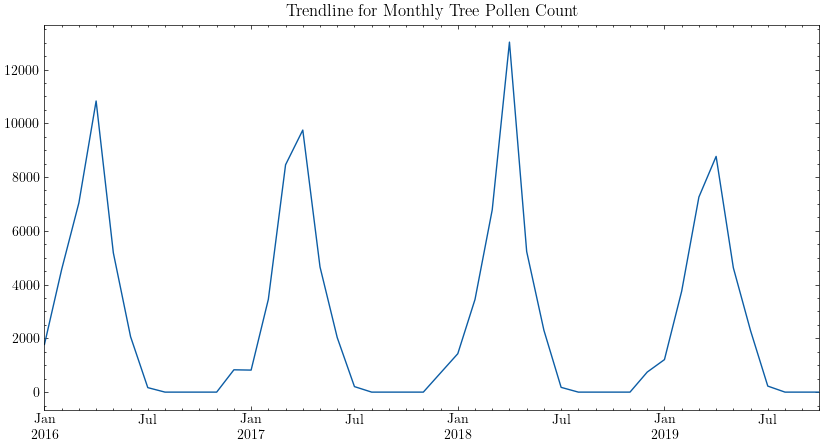

<IPython.core.display.Javascript object>

In [47]:
subset_monthly["treeCount"].plot(figsize=(10, 5))
plt.title("Trendline for Monthly Tree Pollen Count")

Text(0.5, 1.0, 'Trendline for Monthly Grass Pollen Count')

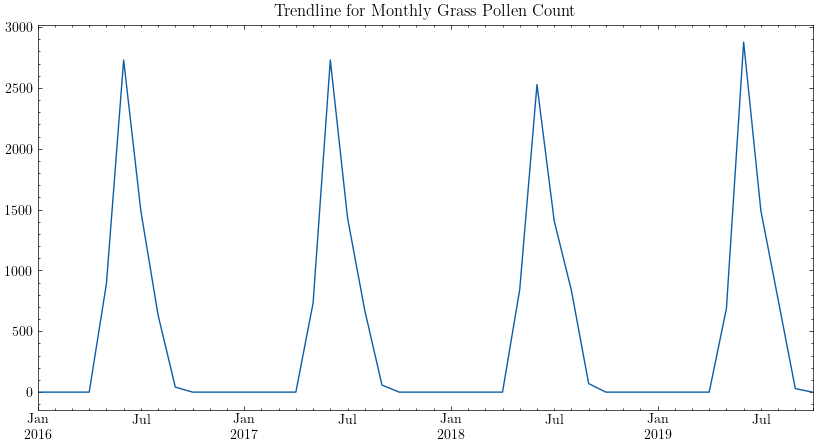

<IPython.core.display.Javascript object>

In [48]:
subset_monthly["grassCount"].plot(figsize=(10, 5))
plt.title("Trendline for Monthly Grass Pollen Count")

Text(0.5, 1.0, 'Trendline for Monthly Weed Pollen Count')

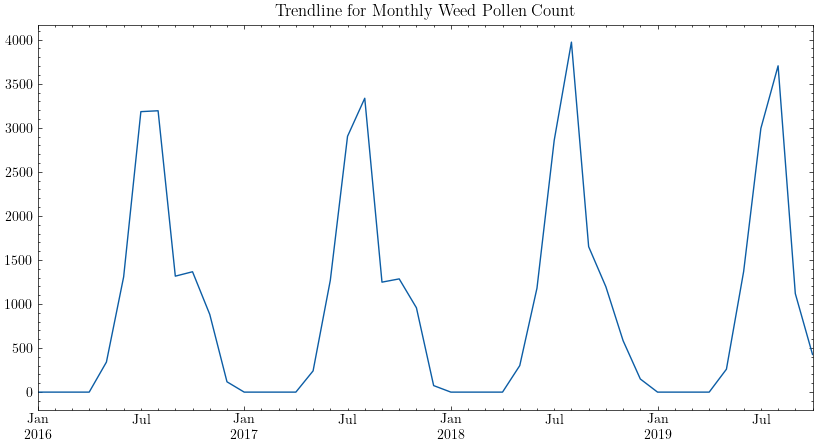

<IPython.core.display.Javascript object>

In [49]:
subset_monthly["weedCount"].plot(figsize=(10, 5))
plt.title("Trendline for Monthly Weed Pollen Count")

Text(0.5, 1.0, 'Relation between Monthly Antihistamine Drug Sales and Total Pollen Count')

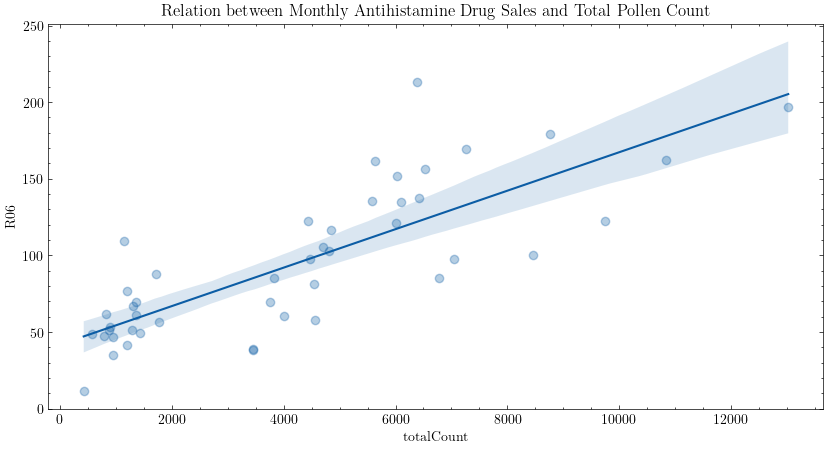

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(10, 5))
sns.regplot(
    x=subset_monthly["totalCount"], y=subset_monthly["R06"], scatter_kws={"alpha": 0.3}
)
plt.title("Relation between Monthly Antihistamine Drug Sales and Total Pollen Count")

In [51]:
normalized_subset_monthly = (subset_monthly - subset_monthly.min()) / (
    subset_monthly.max() - subset_monthly.min()
)

<IPython.core.display.Javascript object>

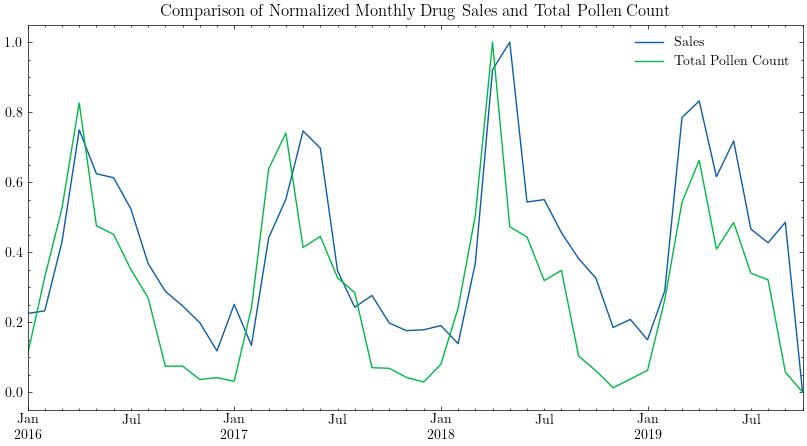

<IPython.core.display.Javascript object>

In [52]:
normalized_subset_monthly["R06"].plot(figsize=(10, 5), label="Sales")
normalized_subset_monthly["totalCount"].plot(
    figsize=(10, 5), label="Total Pollen Count"
)
plt.title("Comparison of Normalized Monthly Drug Sales and Total Pollen Count")
plt.legend()

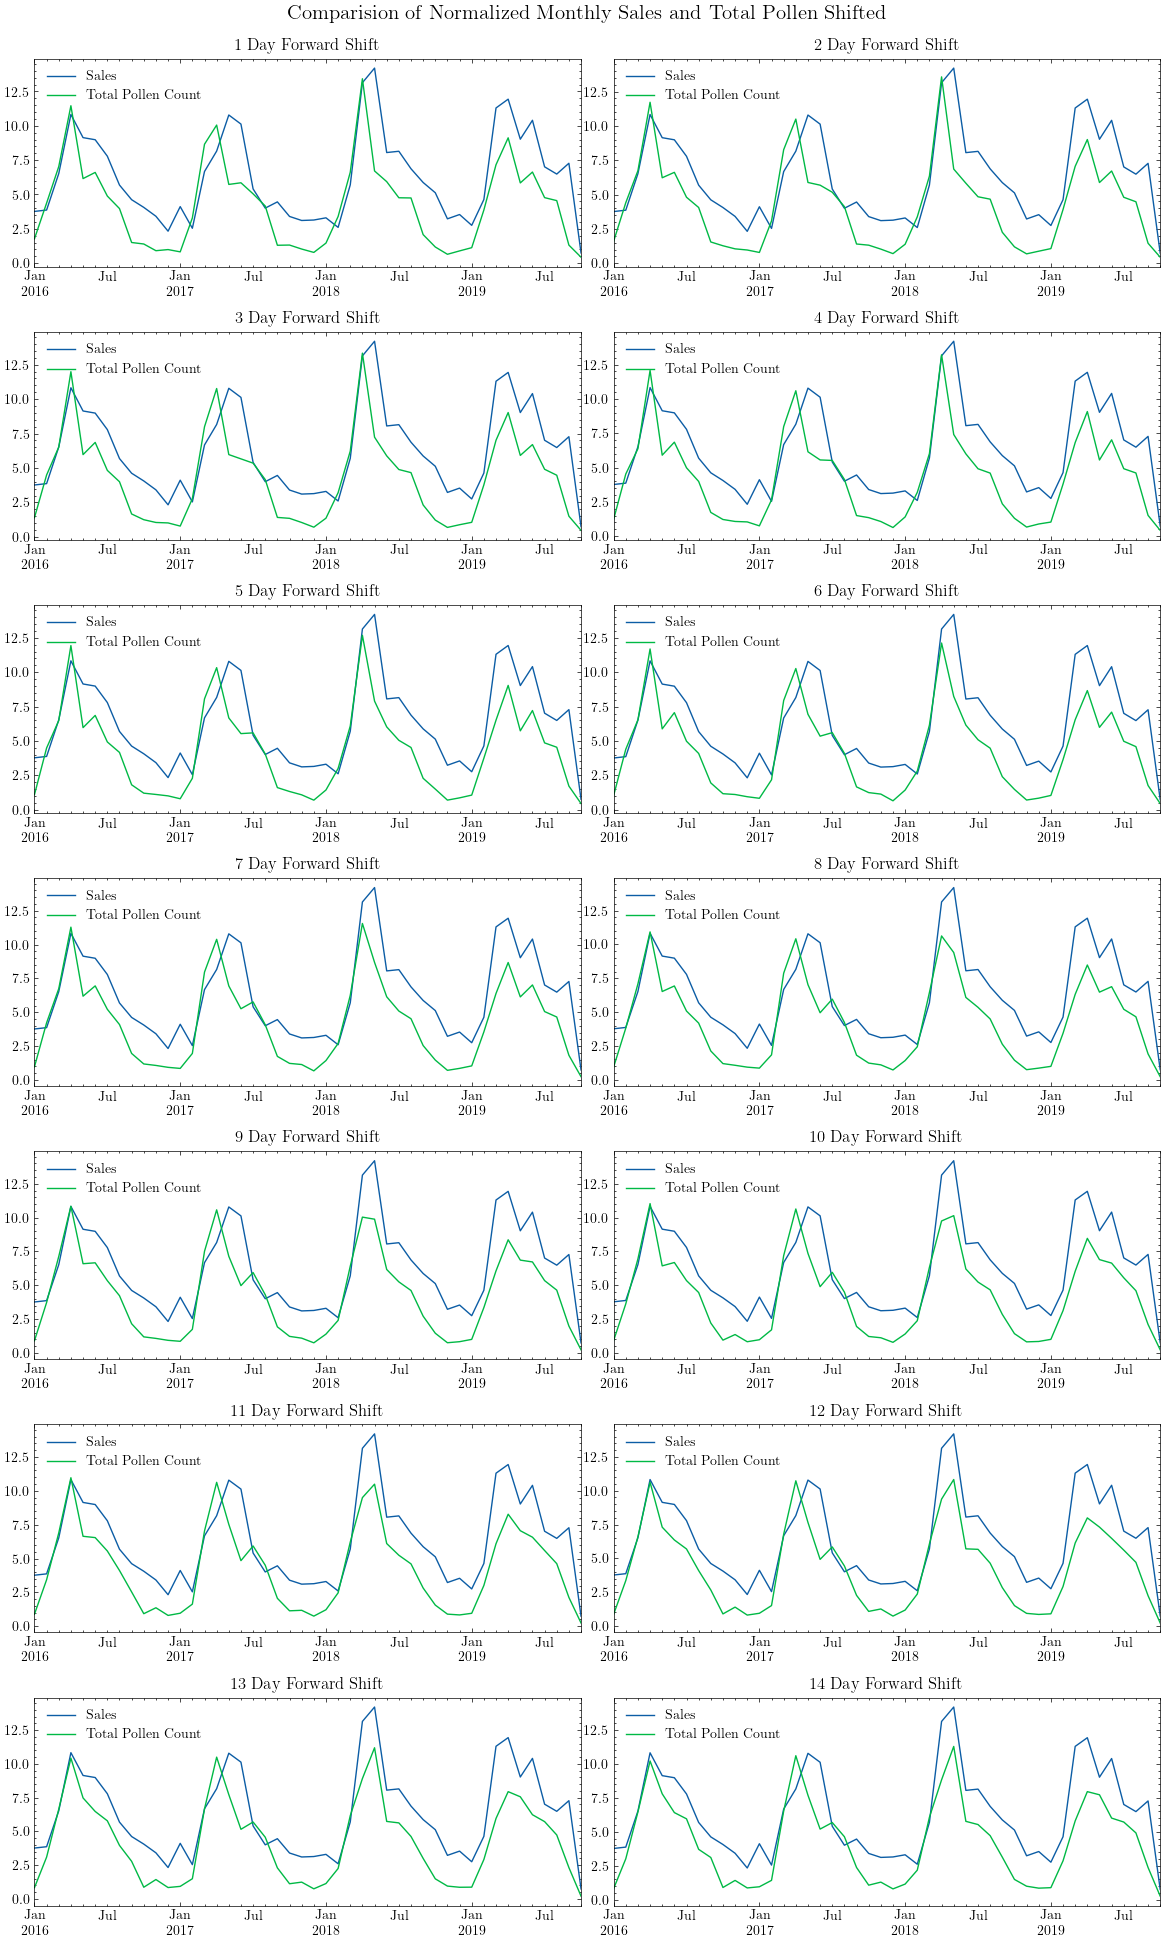

<IPython.core.display.Javascript object>

In [53]:
fig, axes = plt.subplots(7, 2, figsize=(12, 20))
for i in range(1, 15):
    if i % 2 != 0:
        ax = axes[max((i - 1) // 2, 0), 0]
    else:
        ax = axes[(i - 1) // 2, 1]
    temp = normalized_subset.copy()
    temp["totalCount"] = temp["totalCount"].shift(i)
    temp = temp.resample("M").sum()
    temp["R06"].plot(label="Sales", ax=ax)
    temp["totalCount"].plot(label="Total Pollen Count", ax=ax)
    ax.legend()
    ax.title.set_text(str(i) + " Day Forward Shift")
# fig.delaxes(axes[-1, -1])
fig.suptitle(
    "Comparision of Normalized Monthly Sales and Total Pollen Shifted", fontsize=15
)
fig.tight_layout(pad=2, w_pad=1.0, h_pad=1.0)
plt.show()

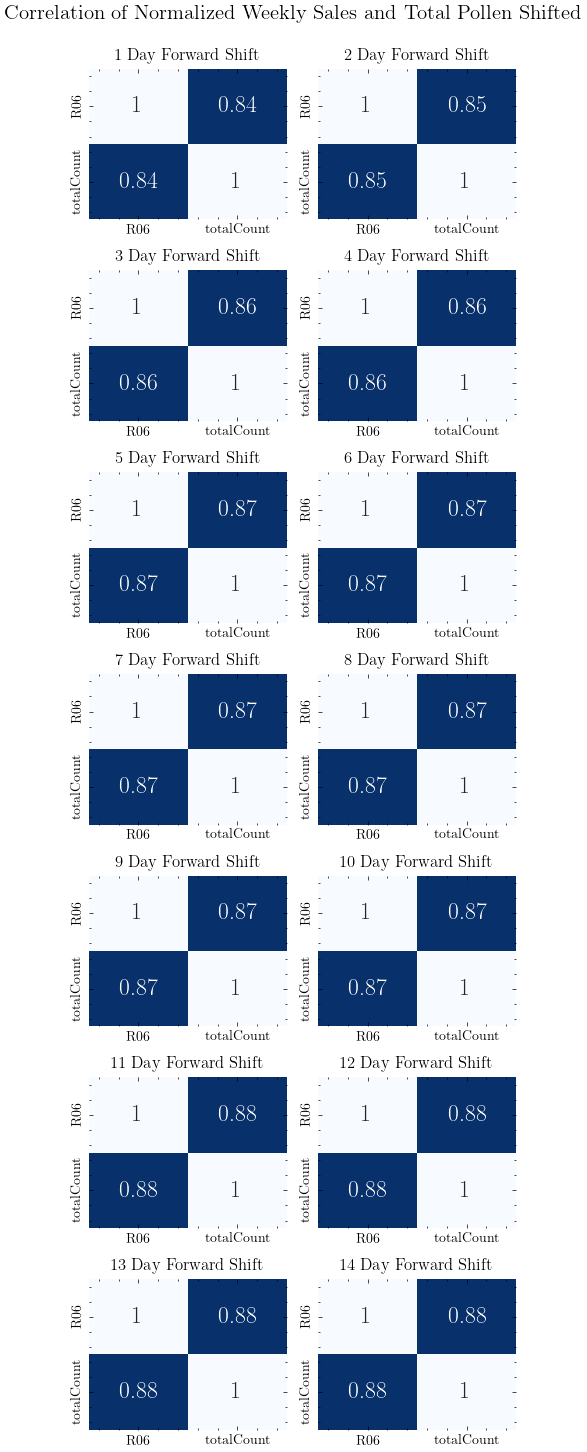

<IPython.core.display.Javascript object>

In [54]:
fig, axes = plt.subplots(7, 2, figsize=(5, 15))
for i in range(1, 15):
    if i % 2 != 0:
        ax = axes[max((i - 1) // 2, 0), 0]
    else:
        ax = axes[(i - 1) // 2, 1]
    temp = normalized_subset.copy()
    temp["totalCount"] = temp["totalCount"].shift(i)
    temp = temp.resample("M").sum()
    sns.heatmap(
        temp[["R06", "totalCount"]].corr(method="spearman"),
        ax=ax,
        annot=True,
        cbar=False,
        cmap="Blues_r",
        annot_kws={"fontsize": 17},
    )
    ax.title.set_text(str(i) + " Day Forward Shift")
# fig.delaxes(axes[-1, -1])
fig.suptitle(
    "Correlation of Normalized Weekly Sales and Total Pollen Shifted", fontsize=15
)
fig.tight_layout(pad=2, w_pad=1.0, h_pad=1.0)
plt.show()

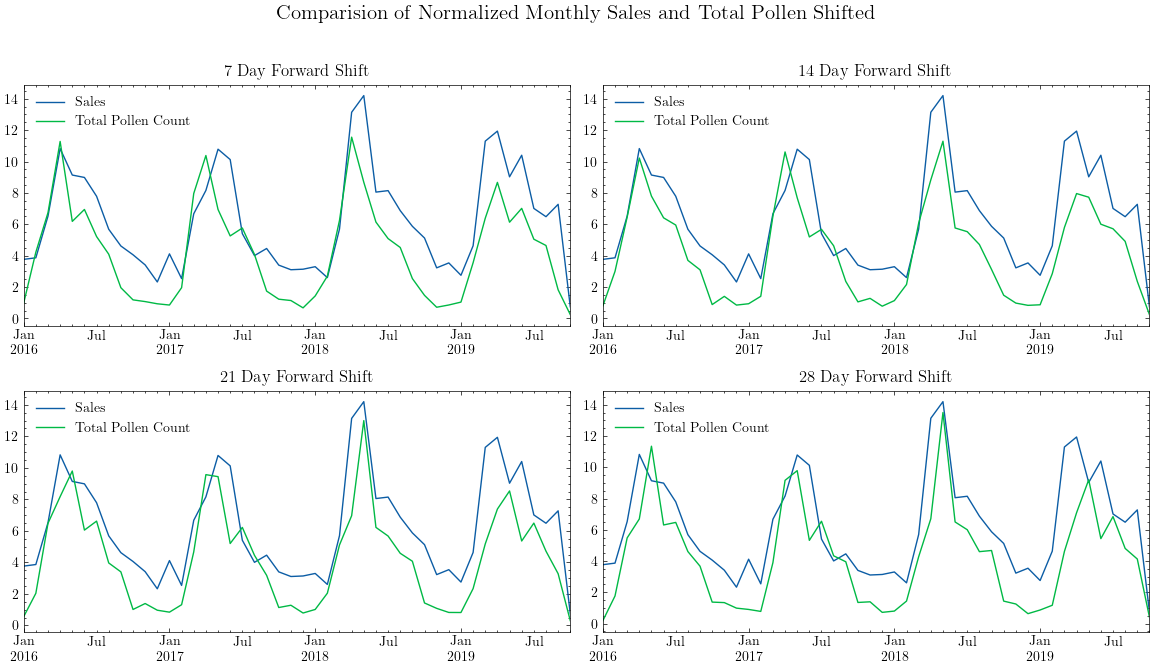

<IPython.core.display.Javascript object>

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
for i in range(7, 29, 7):
    j = i // 7
    if j % 2 != 0:
        ax = axes[max((j - 1) // 2, 0), 0]
    else:
        ax = axes[(j - 1) // 2, 1]
    temp = normalized_subset.copy()
    temp["totalCount"] = temp["totalCount"].shift(i)
    temp = temp.resample("M").sum()
    temp["R06"].plot(label="Sales", ax=ax)
    temp["totalCount"].plot(label="Total Pollen Count", ax=ax)
    ax.legend()
    ax.title.set_text(str(i) + " Day Forward Shift")
# fig.delaxes(axes[-1, -1])
fig.suptitle(
    "Comparision of Normalized Monthly Sales and Total Pollen Shifted", fontsize=15
)
fig.tight_layout(pad=2, w_pad=1.0, h_pad=1.0)
plt.show()

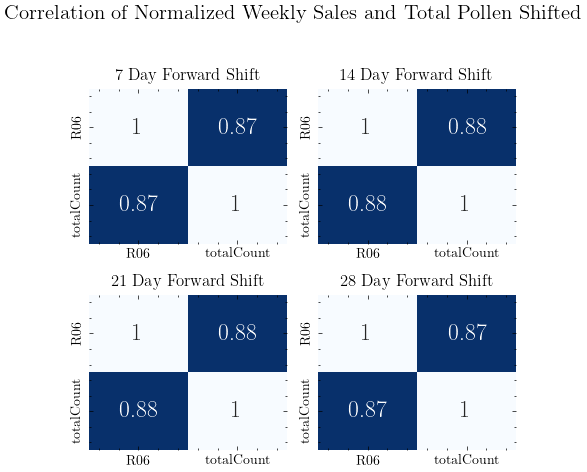

<IPython.core.display.Javascript object>

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(5, 5))
for i in range(7, 29, 7):
    j = i // 7
    if j % 2 != 0:
        ax = axes[max((j - 1) // 2, 0), 0]
    else:
        ax = axes[(j - 1) // 2, 1]
    temp = normalized_subset.copy()
    temp["totalCount"] = temp["totalCount"].shift(i)
    temp = temp.resample("M").sum()
    sns.heatmap(
        temp[["R06", "totalCount"]].corr(method="spearman"),
        ax=ax,
        annot=True,
        cbar=False,
        cmap="Blues_r",
        annot_kws={"fontsize": 17},
    )
    ax.title.set_text(str(i) + " Day Forward Shift")
# fig.delaxes(axes[-1, -1])
fig.suptitle(
    "Correlation of Normalized Weekly Sales and Total Pollen Shifted", fontsize=15
)
fig.tight_layout(pad=2, w_pad=1.0, h_pad=1.0)
plt.show()

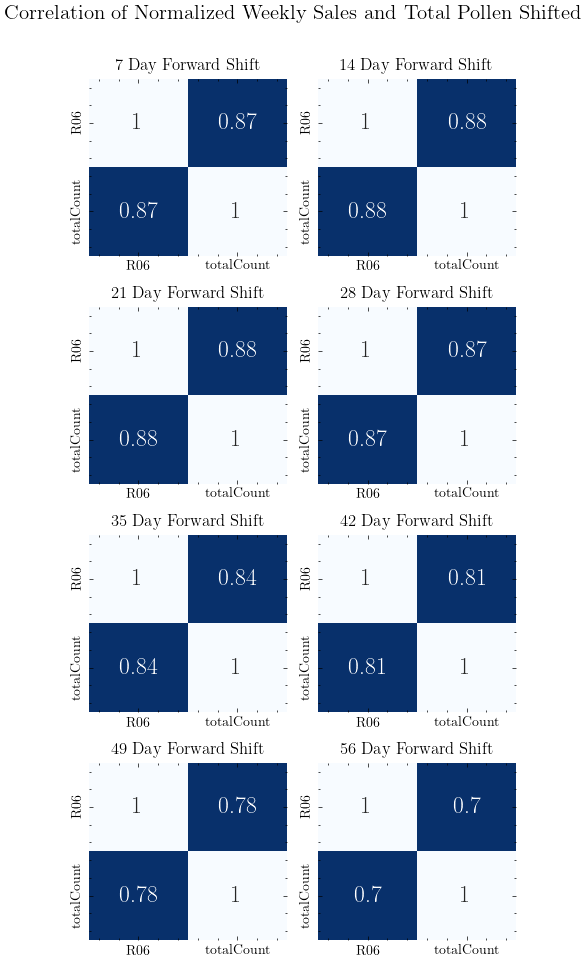

<IPython.core.display.Javascript object>

In [57]:
fig, axes = plt.subplots(4, 2, figsize=(5, 10))
for i in range(7, 57, 7):
    j = i // 7
    if j % 2 != 0:
        ax = axes[max((j - 1) // 2, 0), 0]
    else:
        ax = axes[(j - 1) // 2, 1]
    temp = normalized_subset.copy()
    temp["totalCount"] = temp["totalCount"].shift(i)
    temp = temp.resample("M").sum()
    sns.heatmap(
        temp[["R06", "totalCount"]].corr(method="spearman"),
        ax=ax,
        annot=True,
        cbar=False,
        cmap="Blues_r",
        annot_kws={"fontsize": 17},
    )
    ax.title.set_text(str(i) + " Day Forward Shift")
# fig.delaxes(axes[-1, -1])
fig.suptitle(
    "Correlation of Normalized Weekly Sales and Total Pollen Shifted", fontsize=15
)
fig.tight_layout(pad=2, w_pad=1.0, h_pad=1.0)
plt.show()

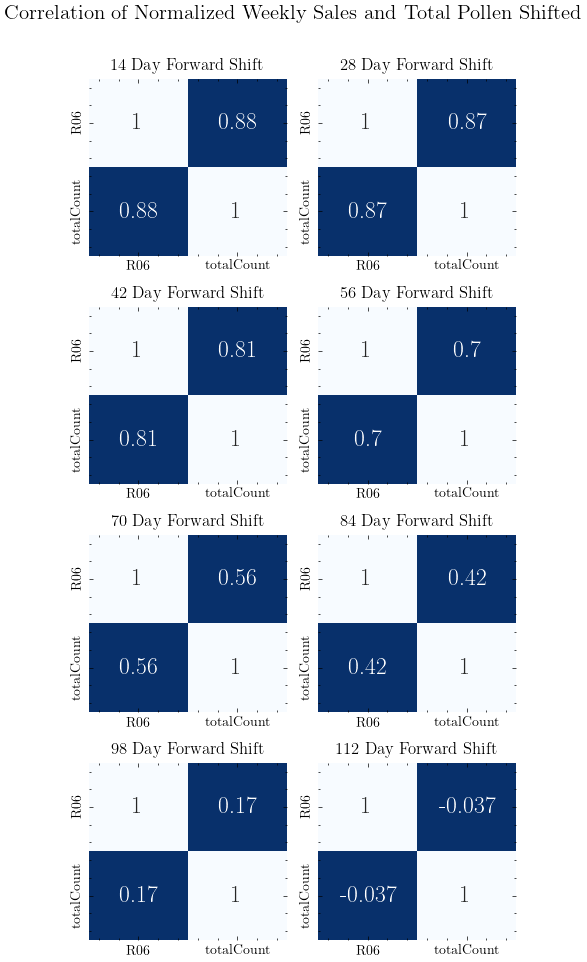

<IPython.core.display.Javascript object>

In [58]:
fig, axes = plt.subplots(4, 2, figsize=(5, 10))
for i in range(14, 113, 14):
    j = i // 14
    if j % 2 != 0:
        ax = axes[max((j - 1) // 2, 0), 0]
    else:
        ax = axes[(j - 1) // 2, 1]
    temp = normalized_subset.copy()
    temp["totalCount"] = temp["totalCount"].shift(i)
    temp = temp.resample("M").sum()
    sns.heatmap(
        temp[["R06", "totalCount"]].corr(method="spearman"),
        ax=ax,
        annot=True,
        cbar=False,
        cmap="Blues_r",
        annot_kws={"fontsize": 17},
    )
    ax.title.set_text(str(i) + " Day Forward Shift")
# fig.delaxes(axes[-1, -1])
fig.suptitle(
    "Correlation of Normalized Weekly Sales and Total Pollen Shifted", fontsize=15
)
fig.tight_layout(pad=2, w_pad=1.0, h_pad=1.0)
plt.show()

In [59]:
monthly_average = subset.copy()
monthly_average["month_no"] = monthly_average.index.month
monthly_average["month"] = monthly_average.index.month_name()
monthly_average = monthly_average.groupby("month").mean().reset_index()
monthly_average = monthly_average.sort_values("month_no")

<IPython.core.display.Javascript object>

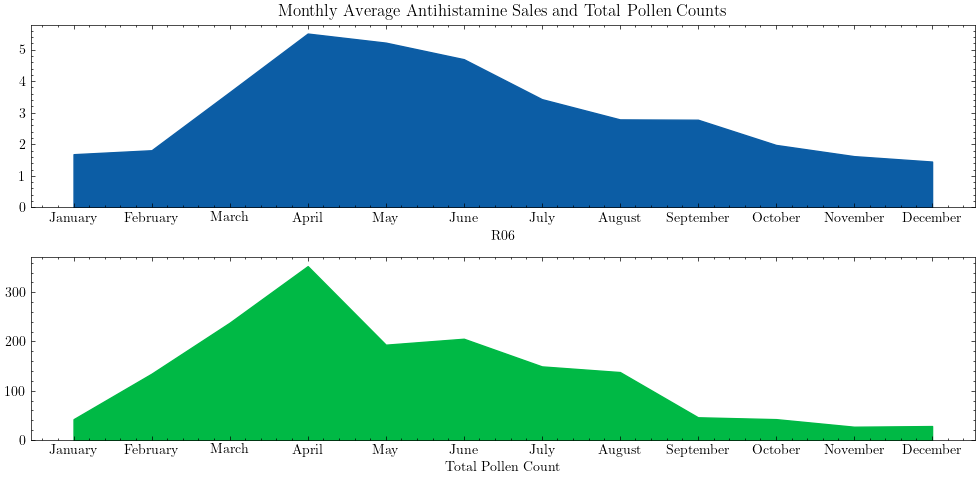

<IPython.core.display.Javascript object>

In [60]:
plt.figure(figsize=(10, 5))
ax = plt.subplot(2, 1, 1)
plt.title("Monthly Average Antihistamine Sales and Total Pollen Counts")
plt.xlabel("R06")
plt.xticks(np.arange(1, 13, 1.0))
ax.set_xticklabels(list(monthly_average["month"]))
ax = plt.stackplot(monthly_average["month_no"], monthly_average["R06"], color="#0C5DA5")
ax = plt.subplot(2, 1, 2)
plt.xlabel("Total Pollen Count")
plt.xticks(np.arange(1, 13, 1.0))
ax.set_xticklabels(list(monthly_average["month"]))
ax = plt.stackplot(
    monthly_average["month_no"], monthly_average["totalCount"], color="#00B945"
)
plt.tight_layout()

## Takeaways

1. Aggregating it to monthly and taking sum removes even more noise 
2. The correlation further increases to 80% at monthly level
3. By shifting upto 14 days and taking monthly aggregate the correlation increased upto 88%
4. With 7 day shifts and taking monthly aggregate, we once again see that it maxes at 14 days
5. With approximately 1 month shifted (28 days), the correlation is around 84% which is higher than current month's correlation of 80%
6. Froth 28th day till 56th, the correlation gradually decreases and after 56 days of shifting, the correlation begins to decrease sharply
7. Both Pollen and Sales peak from March till July with highest being in April for both of them.
8. After August Pollen sharply reduces while sales decreases gradually

<div style="page-break-after: always"></div>

# Analysis of Relationship between Sales and Species

In [61]:
species_data = merged_data.copy()
species_data = species_data.fillna(0)
species_data = species_data.drop(
    ["treeCount", "grassCount", "weedCount", "totalCount"], axis=1
)

<IPython.core.display.Javascript object>

In [62]:
corr = species_data.corr(method="spearman", numeric_only=True)[["R06"]].dropna()
corr = corr[corr["R06"] >= 0.20]
display(corr)

R06
R06                               1.000000
data_species_tree_Pine            0.426800
data_species_tree_Oak             0.479112
data_species_tree_Plane           0.408817
data_species_tree_Birch           0.450686
data_species_grass_Grass_Poaceae  0.316217

<IPython.core.display.Javascript object>

In [63]:
species_data = species_data[list(corr.index)]

<IPython.core.display.Javascript object>

In [64]:
species_data.columns = ["R06", "Pine", "Oak", "Plane", "Birch", "Poaceae"]

<IPython.core.display.Javascript object>

In [65]:
display(species_data.corr(method="spearman")[["R06"]])

R06
R06      1.000000
Pine     0.426800
Oak      0.479112
Plane    0.408817
Birch    0.450686
Poaceae  0.316217

<IPython.core.display.Javascript object>

In [66]:
species_data_weekly = species_data.resample("W").sum()
display(species_data_weekly.corr(method="spearman")[["R06"]])

R06
R06      1.000000
Pine     0.660720
Oak      0.729330
Plane    0.632286
Birch    0.706779
Poaceae  0.499926

<IPython.core.display.Javascript object>

In [67]:
species_data_monthly = species_data.resample("M").sum()
display(species_data_monthly.corr(method="spearman")[["R06"]])

R06
R06      1.000000
Pine     0.759494
Oak      0.845786
Plane    0.766313
Birch    0.830800
Poaceae  0.521075

<IPython.core.display.Javascript object>

In [68]:
species_data.describe()

R06         Pine          Oak        Plane        Birch  \
count  1377.000000  1377.000000  1377.000000  1377.000000  1377.000000   
mean      3.140378     5.404503    12.517792     6.048656    21.022513   
std       2.530839    13.744917    21.682899    14.995584    50.946608   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000     0.000000   
50%       3.000000     0.000000     0.000000     0.000000     0.000000   
75%       4.200000     3.000000    21.000000     3.000000    19.000000   
max      15.000000   126.000000   145.000000   136.000000   486.000000   

           Poaceae  
count  1377.000000  
mean     16.660131  
std      31.795368  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%      23.000000  
max     250.000000

<IPython.core.display.Javascript object>

We can see that almost all species have 0 for most records, since pollen is mainly produced only inside a season. This might add bias and 0 values for continueous period cannot be used to infer sales hence, we shall remove zero values from the species and reanalyse. 

In [69]:
species_data[["Pine", "Oak", "Plane", "Birch", "Poaceae"]] = species_data[
    ["Pine", "Oak", "Plane", "Birch", "Poaceae"]
].replace(0, np.nan)

<IPython.core.display.Javascript object>

In [70]:
display(species_data.corr(method="spearman")[["R06"]])

R06
R06      1.000000
Pine     0.075626
Oak      0.205880
Plane    0.151493
Birch    0.152343
Poaceae  0.193121

<IPython.core.display.Javascript object>

We can see that the correlation drops significantly once we remove 0 values.

In [71]:
species_data_weekly[["Pine", "Oak", "Plane", "Birch", "Poaceae"]] = species_data_weekly[
    ["Pine", "Oak", "Plane", "Birch", "Poaceae"]
].replace(0, np.nan)
display(species_data_weekly.corr(method="spearman")[["R06"]])

R06
R06      1.000000
Pine     0.114801
Oak      0.466038
Plane    0.264295
Birch    0.344726
Poaceae  0.327697

<IPython.core.display.Javascript object>

In [72]:
species_data_monthly[
    ["Pine", "Oak", "Plane", "Birch", "Poaceae"]
] = species_data_monthly[["Pine", "Oak", "Plane", "Birch", "Poaceae"]].replace(
    0, np.nan
)
display(species_data_monthly.corr(method="spearman")[["R06"]])

R06
R06      1.000000
Pine     0.500000
Oak      0.709774
Plane    0.423529
Birch    0.595489
Poaceae  0.534788

<IPython.core.display.Javascript object>

However, weekly, monthly correlation is still better

In [73]:
normalized_species = (species_data - species_data.min(numeric_only=True)) / (
    species_data.max(numeric_only=True) - species_data.min(numeric_only=True)
)

<IPython.core.display.Javascript object>

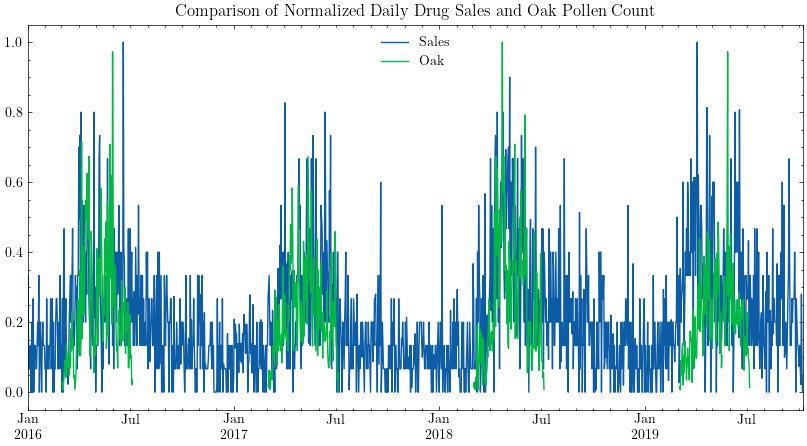

<IPython.core.display.Javascript object>

In [74]:
normalized_species["R06"].plot(figsize=(10, 5), label="Sales")
normalized_species["Oak"].plot(figsize=(10, 5), label="Oak")
plt.title("Comparison of Normalized Daily Drug Sales and Oak Pollen Count")
plt.legend()

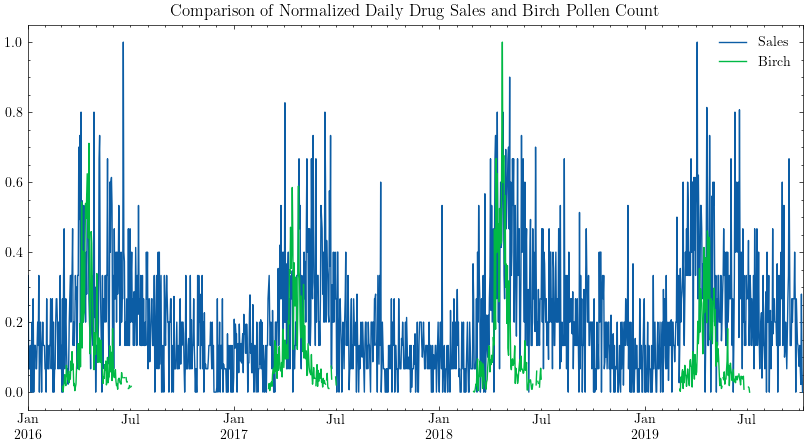

<IPython.core.display.Javascript object>

In [75]:
normalized_species["R06"].plot(figsize=(10, 5), label="Sales")
normalized_species["Birch"].plot(figsize=(10, 5), label="Birch")
plt.title("Comparison of Normalized Daily Drug Sales and Birch Pollen Count")
plt.legend()

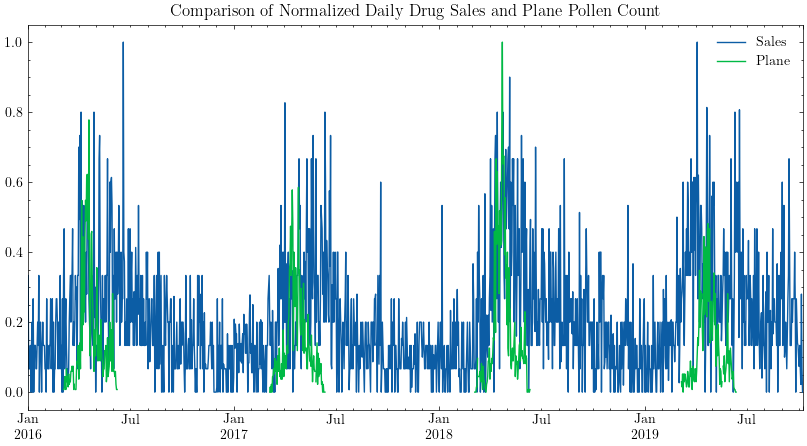

<IPython.core.display.Javascript object>

In [76]:
normalized_species["R06"].plot(figsize=(10, 5), label="Sales")
normalized_species["Plane"].plot(figsize=(10, 5), label="Plane")
plt.title("Comparison of Normalized Daily Drug Sales and Plane Pollen Count")
plt.legend()

Text(0.5, 1.0, 'Relation between Daily Antihistamine Drug Sales and Oak Pollen Count')

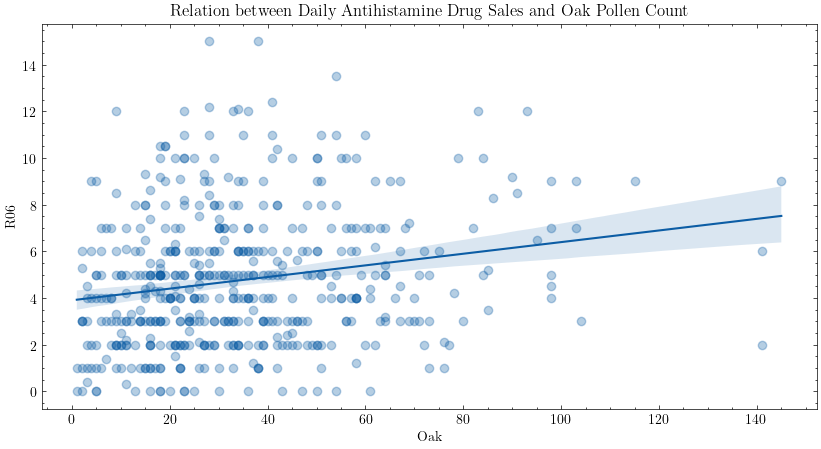

<IPython.core.display.Javascript object>

In [77]:
plt.figure(figsize=(10, 5))
sns.regplot(x=species_data["Oak"], y=species_data["R06"], scatter_kws={"alpha": 0.3})
plt.title("Relation between Daily Antihistamine Drug Sales and Oak Pollen Count")

Text(0.5, 1.0, 'Relation between Daily Antihistamine Drug Sales and Birch Pollen Count')

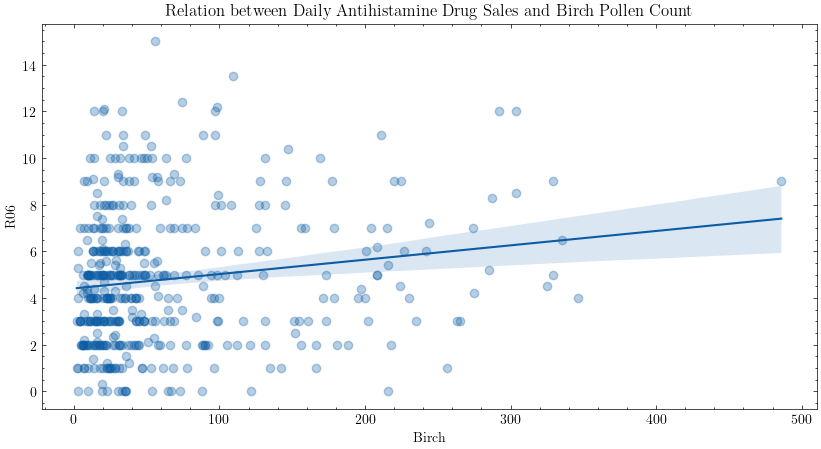

<IPython.core.display.Javascript object>

In [78]:
plt.figure(figsize=(10, 5))
sns.regplot(x=species_data["Birch"], y=species_data["R06"], scatter_kws={"alpha": 0.3})
plt.title("Relation between Daily Antihistamine Drug Sales and Birch Pollen Count")

Text(0.5, 1.0, 'Relation between Daily Antihistamine Drug Sales and Plane Pollen Count')

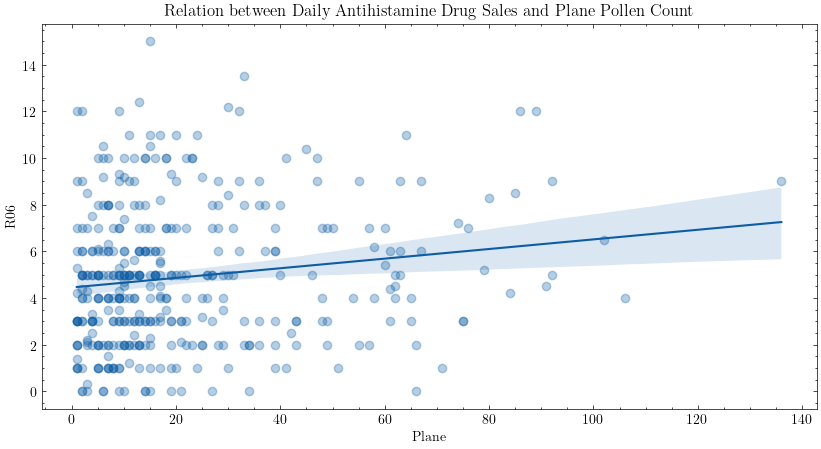

<IPython.core.display.Javascript object>

In [79]:
plt.figure(figsize=(10, 5))
sns.regplot(x=species_data["Plane"], y=species_data["R06"], scatter_kws={"alpha": 0.3})
plt.title("Relation between Daily Antihistamine Drug Sales and Plane Pollen Count")

In [80]:
normalized_species_weekly = (
    species_data_weekly - species_data_weekly.min(numeric_only=True)
) / (
    species_data_weekly.max(numeric_only=True)
    - species_data_weekly.min(numeric_only=True)
)

<IPython.core.display.Javascript object>

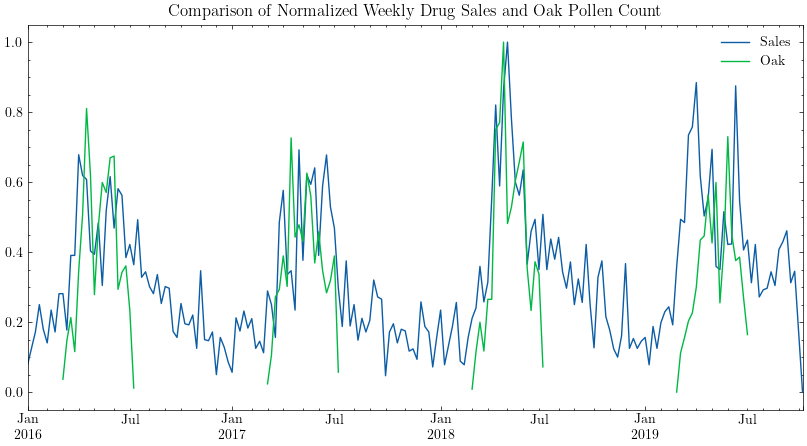

<IPython.core.display.Javascript object>

In [81]:
normalized_species_weekly["R06"].plot(figsize=(10, 5), label="Sales")
normalized_species_weekly["Oak"].plot(figsize=(10, 5), label="Oak")
plt.title("Comparison of Normalized Weekly Drug Sales and Oak Pollen Count")
plt.legend()

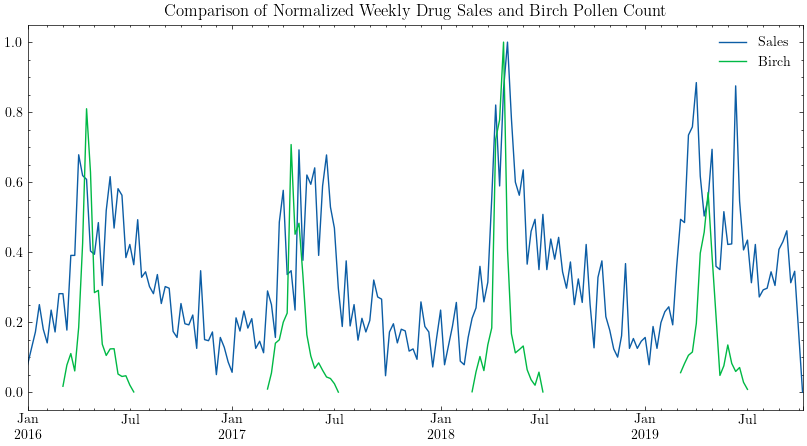

<IPython.core.display.Javascript object>

In [82]:
normalized_species_weekly["R06"].plot(figsize=(10, 5), label="Sales")
normalized_species_weekly["Birch"].plot(figsize=(10, 5), label="Birch")
plt.title("Comparison of Normalized Weekly Drug Sales and Birch Pollen Count")
plt.legend()

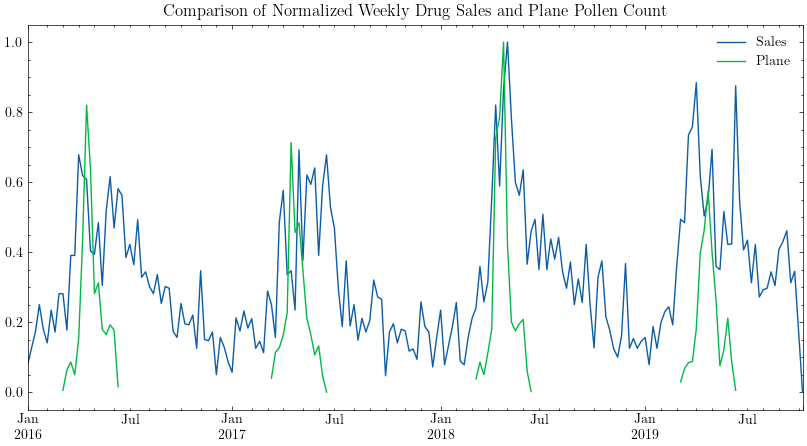

<IPython.core.display.Javascript object>

In [83]:
normalized_species_weekly["R06"].plot(figsize=(10, 5), label="Sales")
normalized_species_weekly["Plane"].plot(figsize=(10, 5), label="Plane")
plt.title("Comparison of Normalized Weekly Drug Sales and Plane Pollen Count")
plt.legend()

Text(0.5, 1.0, 'Relation between Weekly Antihistamine Drug Sales and Oak Pollen Count')

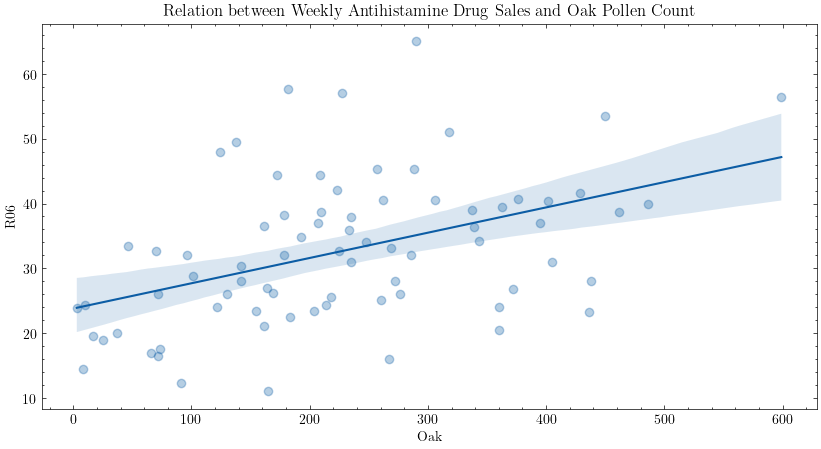

<IPython.core.display.Javascript object>

In [84]:
plt.figure(figsize=(10, 5))
sns.regplot(
    x=species_data_weekly["Oak"],
    y=species_data_weekly["R06"],
    scatter_kws={"alpha": 0.3},
)
plt.title("Relation between Weekly Antihistamine Drug Sales and Oak Pollen Count")

Text(0.5, 1.0, 'Relation between Weekly Antihistamine Drug Sales and Birch Pollen Count')

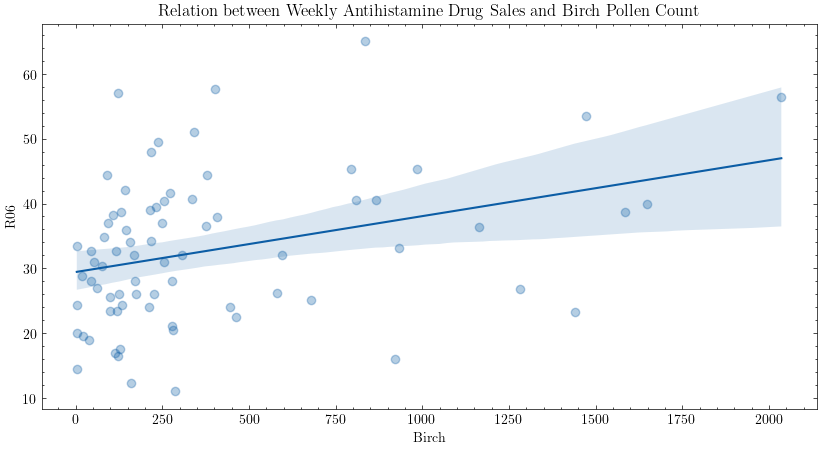

<IPython.core.display.Javascript object>

In [85]:
plt.figure(figsize=(10, 5))
sns.regplot(
    x=species_data_weekly["Birch"],
    y=species_data_weekly["R06"],
    scatter_kws={"alpha": 0.3},
)
plt.title("Relation between Weekly Antihistamine Drug Sales and Birch Pollen Count")

Text(0.5, 1.0, 'Relation between Weekly Antihistamine Drug Sales and Plane Pollen Count')

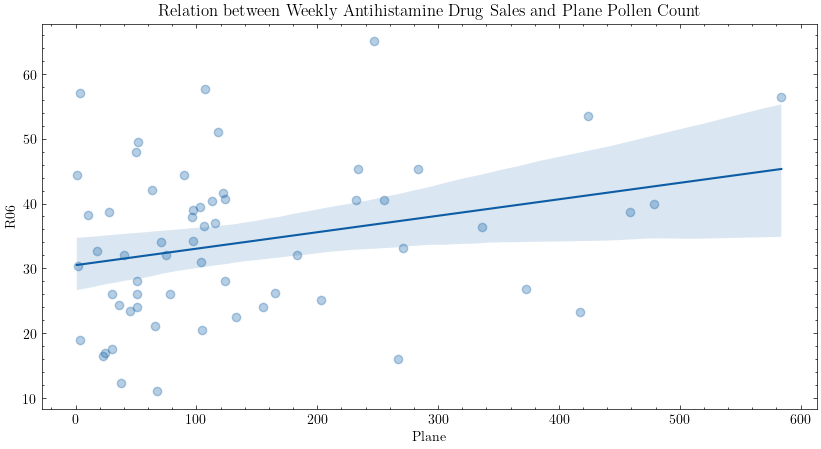

<IPython.core.display.Javascript object>

In [86]:
plt.figure(figsize=(10, 5))
sns.regplot(
    x=species_data_weekly["Plane"],
    y=species_data_weekly["R06"],
    scatter_kws={"alpha": 0.3},
)
plt.title("Relation between Weekly Antihistamine Drug Sales and Plane Pollen Count")

In [87]:
normalized_species_monthly = (
    species_data_monthly - species_data_monthly.min(numeric_only=True)
) / (
    species_data_monthly.max(numeric_only=True)
    - species_data_monthly.min(numeric_only=True)
)

<IPython.core.display.Javascript object>

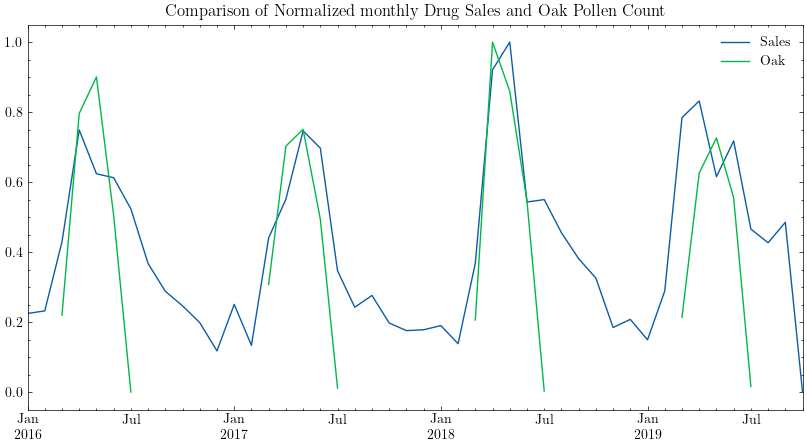

<IPython.core.display.Javascript object>

In [88]:
normalized_species_monthly["R06"].plot(figsize=(10, 5), label="Sales")
normalized_species_monthly["Oak"].plot(figsize=(10, 5), label="Oak")
plt.title("Comparison of Normalized monthly Drug Sales and Oak Pollen Count")
plt.legend()

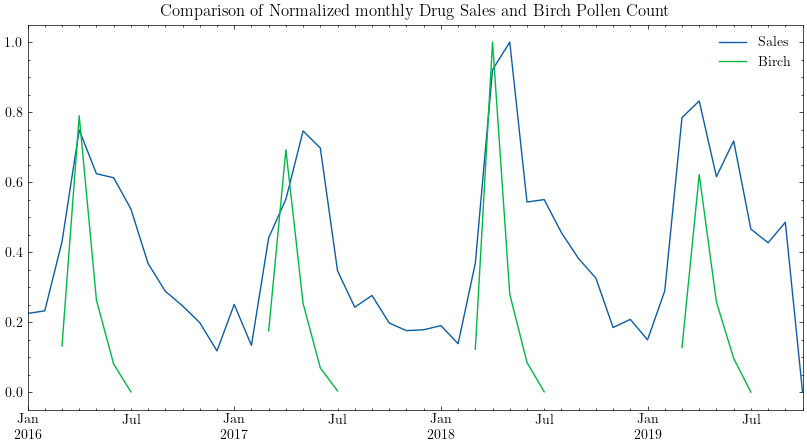

<IPython.core.display.Javascript object>

In [89]:
normalized_species_monthly["R06"].plot(figsize=(10, 5), label="Sales")
normalized_species_monthly["Birch"].plot(figsize=(10, 5), label="Birch")
plt.title("Comparison of Normalized monthly Drug Sales and Birch Pollen Count")
plt.legend()

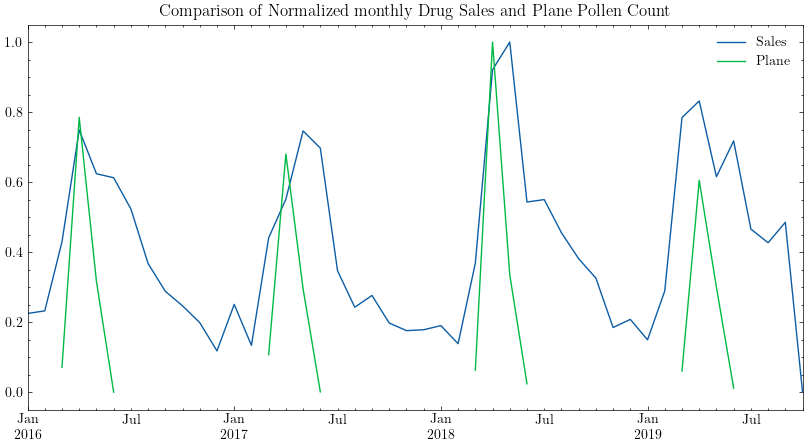

<IPython.core.display.Javascript object>

In [90]:
normalized_species_monthly["R06"].plot(figsize=(10, 5), label="Sales")
normalized_species_monthly["Plane"].plot(figsize=(10, 5), label="Plane")
plt.title("Comparison of Normalized monthly Drug Sales and Plane Pollen Count")
plt.legend()

Text(0.5, 1.0, 'Relation between monthly Antihistamine Drug Sales and Oak Pollen Count')

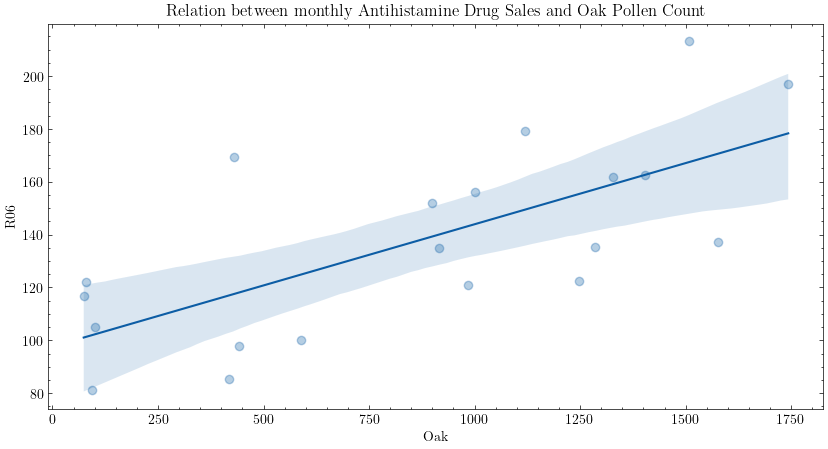

<IPython.core.display.Javascript object>

In [91]:
plt.figure(figsize=(10, 5))
sns.regplot(
    x=species_data_monthly["Oak"],
    y=species_data_monthly["R06"],
    scatter_kws={"alpha": 0.3},
)
plt.title("Relation between monthly Antihistamine Drug Sales and Oak Pollen Count")

Text(0.5, 1.0, 'Relation between monthly Antihistamine Drug Sales and Birch Pollen Count')

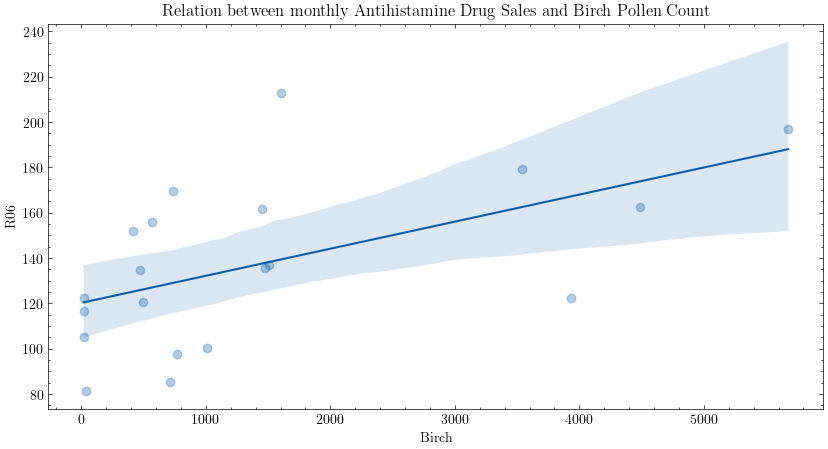

<IPython.core.display.Javascript object>

In [92]:
plt.figure(figsize=(10, 5))
sns.regplot(
    x=species_data_monthly["Birch"],
    y=species_data_monthly["R06"],
    scatter_kws={"alpha": 0.3},
)
plt.title("Relation between monthly Antihistamine Drug Sales and Birch Pollen Count")

Text(0.5, 1.0, 'Relation between monthly Antihistamine Drug Sales and Plane Pollen Count')

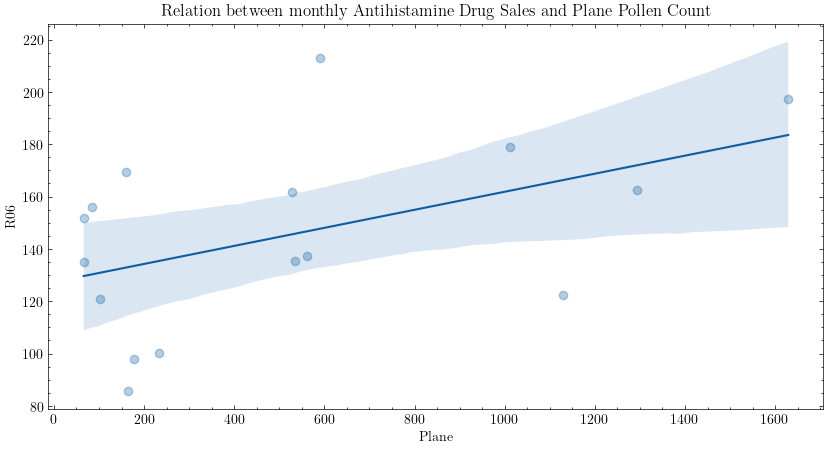

<IPython.core.display.Javascript object>

In [93]:
plt.figure(figsize=(10, 5))
sns.regplot(
    x=species_data_monthly["Plane"],
    y=species_data_monthly["R06"],
    scatter_kws={"alpha": 0.3},
)
plt.title("Relation between monthly Antihistamine Drug Sales and Plane Pollen Count")

## Takeways
1. Oak, Birch and Plane peak during the periods with highest sales. 
2. However they are not sufficient enough by themselves in order to predict the sales of antihistamines
3. When 0 values are removed, correlation decreases significantly
4. Pine and Grass also show moderate correlation

<div style="page-break-after: always"></div>

# Predicting Sales Using Current Pollen

In [94]:
display(subset.corr(method="spearman"))

R06  treeCount  grassCount  weedCount  totalCount
R06         1.000000   0.271183    0.316217   0.081401    0.412610
treeCount   0.271183   1.000000   -0.098147  -0.653180    0.658268
grassCount  0.316217  -0.098147    1.000000   0.672866    0.408139
weedCount   0.081401  -0.653180    0.672866   1.000000    0.064992
totalCount  0.412610   0.658268    0.408139   0.064992    1.000000

<IPython.core.display.Javascript object>

In [95]:
display(subset_weekly.corr(method="spearman"))

R06  treeCount  grassCount  weedCount  totalCount
R06         1.000000   0.412527    0.499926   0.132132    0.691549
treeCount   0.412527   1.000000   -0.123394  -0.718500    0.712594
grassCount  0.499926  -0.123394    1.000000   0.668526    0.378842
weedCount   0.132132  -0.718500    0.668526   1.000000   -0.068394
totalCount  0.691549   0.712594    0.378842  -0.068394    1.000000

<IPython.core.display.Javascript object>

In [96]:
display(subset_monthly.corr(method="spearman"))

R06  treeCount  grassCount  weedCount  totalCount
R06         1.000000   0.509461    0.521075   0.091234    0.817206
treeCount   0.509461   1.000000   -0.144971  -0.719210    0.751606
grassCount  0.521075  -0.144971    1.000000   0.714635    0.310846
weedCount   0.091234  -0.719210    0.714635   1.000000   -0.156697
totalCount  0.817206   0.751606    0.310846  -0.156697    1.000000

<IPython.core.display.Javascript object>

# Modeling Daily Sales

In [97]:
subset_1 = subset.copy()

<IPython.core.display.Javascript object>

In [98]:
subset_1.head()

R06  treeCount  grassCount  weedCount  totalCount
2016-01-01  0.0          2           0          0           2
2016-01-02  5.0         19           0          0          19
2016-01-03  1.0        158           0          0         158
2016-01-04  1.0         30           0          0          30
2016-01-05  1.0         41           0          0          41

<IPython.core.display.Javascript object>

In [99]:
subset_1 = subset_1.dropna()
subset_1 = subset_1[["totalCount", "R06"]]
subset_1

totalCount   R06
2016-01-01           2  0.00
2016-01-02          19  5.00
2016-01-03         158  1.00
2016-01-04          30  1.00
2016-01-05          41  1.00
...                ...   ...
2019-10-04          15  1.00
2019-10-05          77  0.33
2019-10-06           0  4.20
2019-10-07          26  1.00
2019-10-08          32  0.00

[1377 rows x 2 columns]

<IPython.core.display.Javascript object>

In [100]:
import statsmodels.api as sm

model_daily = sm.OLS(
    subset_1["R06"],
    sm.add_constant(subset_1["totalCount"]),
    missing="drop",
)
results = model_daily.fit()
results_summary = results.summary()

<IPython.core.display.Javascript object>

In [101]:
results_as_html = results_summary.tables[0].as_html()
summary = pd.read_html(results_as_html)[0]
summary.columns = ["OLS Results Summary", " ", "  ", "   "]
display(summary)

OLS Results Summary                                                     
0      Dep. Variable:               R06           R-squared:  1.570000e-01
1              Model:               OLS      Adj. R-squared:  1.570000e-01
2             Method:     Least Squares         F-statistic:  2.564000e+02
3               Date:  Fri, 03 Feb 2023  Prob (F-statistic):  4.890000e-53
4               Time:          00:15:44      Log-Likelihood: -3.114300e+03
5   No. Observations:              1377                 AIC:  6.233000e+03
6       Df Residuals:              1375                 BIC:  6.243000e+03
7           Df Model:                 1                  NaN           NaN
8    Covariance Type:         nonrobust                  NaN           NaN

<IPython.core.display.Javascript object>

In [194]:
1.570000e-01

0.157

<IPython.core.display.Javascript object>

In [102]:
results_as_html = results_summary.tables[1].as_html()
summary = pd.read_html(results_as_html, header=0, index_col=0)[0]
display(summary)

coef  std err       t  P>|t|  [0.025  0.975]
const       2.0780    0.091  22.774    0.0   1.899   2.257
totalCount  0.0076    0.000  16.011    0.0   0.007   0.009

<IPython.core.display.Javascript object>

In [103]:
results_as_html = results_summary.tables[2].as_html()
summary = pd.read_html(results_as_html)[0]
summary.columns = ["OLS Summary 3", " ", "  ", "   "]
display(summary)

OLS Summary 3                                          
0        Omnibus:  243.551     Durbin-Watson:  1.623000e+00
1  Prob(Omnibus):    0.000  Jarque-Bera (JB):  4.535640e+02
2           Skew:    1.072          Prob(JB):  3.230000e-99
3       Kurtosis:    4.820          Cond. No.  2.790000e+02

<IPython.core.display.Javascript object>

In [104]:
pred = results.predict(sm.add_constant(subset_1["totalCount"]))
subset_1["Modelled"] = pred

<IPython.core.display.Javascript object>

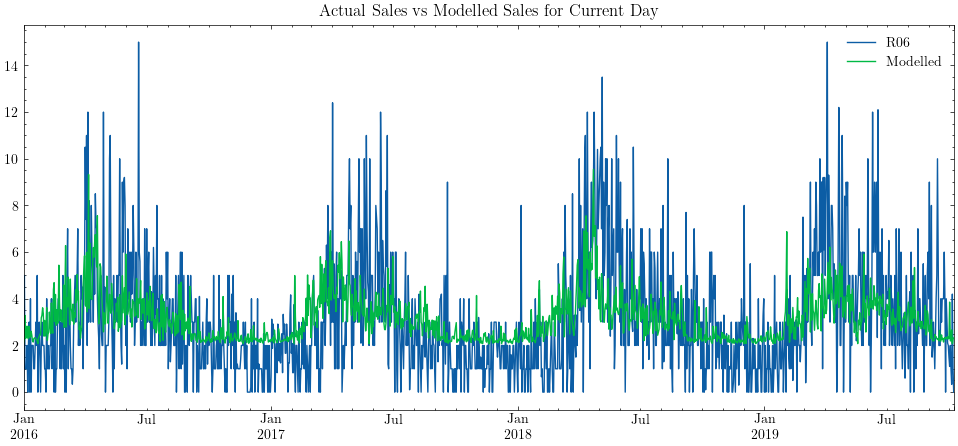

<IPython.core.display.Javascript object>

In [105]:
plt.figure(figsize=(12, 5))
subset_1["R06"].plot()
subset_1["Modelled"].plot()
plt.title("Actual Sales vs Modelled Sales for Current Day")
plt.legend()

Text(0.5, 1.0, 'Regression Model for Current Day')

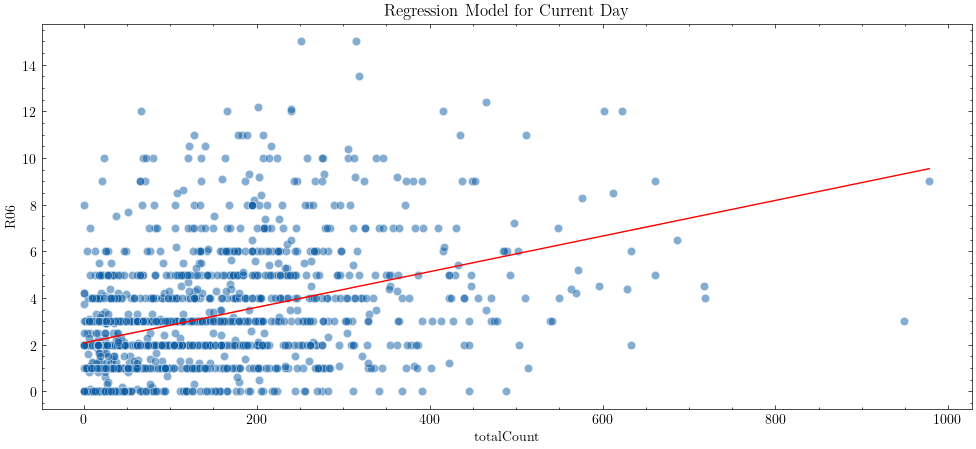

<IPython.core.display.Javascript object>

In [106]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=subset_1, x="totalCount", y="R06", alpha=0.5)
sns.lineplot(subset_1, x="totalCount", y="Modelled", color="Red")
plt.title("Regression Model for Current Day")

In [107]:
display(subset_1.corr(method="spearman"))

totalCount      R06  Modelled
totalCount     1.00000  0.41261   1.00000
R06            0.41261  1.00000   0.41261
Modelled       1.00000  0.41261   1.00000

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Model Error')

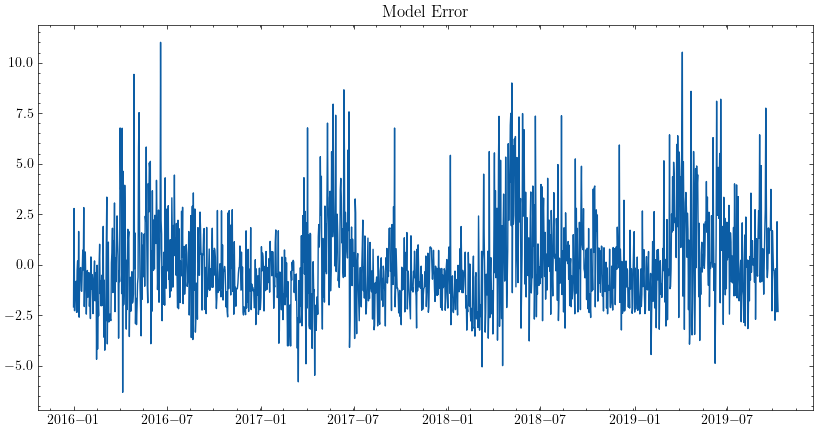

<IPython.core.display.Javascript object>

In [108]:
plt.figure(figsize=(10, 5))
plt.plot(subset_1["R06"] - subset_1["Modelled"])
plt.title("Model Error")

In [109]:
"%.2f" % results.f_pvalue

'0.00'

<IPython.core.display.Javascript object>

In [110]:
mean_absolute_error(subset_1["R06"], subset_1["Modelled"])

1.7497179042017763

<IPython.core.display.Javascript object>

In [111]:
subset_1["R06"].mean()

3.1403776325344954

<IPython.core.display.Javascript object>

In [112]:
subset_1 = subset_1[subset_1["R06"] != 0]

<IPython.core.display.Javascript object>

In [113]:
(100 - mean_absolute_percentage_error(subset_1["R06"], subset_1["Modelled"]) * 100)

28.690552441396193

<IPython.core.display.Javascript object>

## Takeaways

1. As expected, since daily data has a lot of noise from both sales and pollen, the model isn't able to explain the relationship well.
2. R2 score is very low at 16% 
3. Mean absolute error is 1.75 which is large compared to the mean of the dataset at 3.14
4. 100 - MAPE is just 29%
5. (Need to look for more insights)

<div style="page-break-after: always"></div>

# Modeling Weekly Sales Using Pollen

In [114]:
subset_1 = subset_weekly.copy()
subset_1.head()

R06  treeCount  grassCount  weedCount  totalCount
2016-01-03   6.0        179           0          0         179
2016-01-10   9.0        367           0          0         367
2016-01-17  12.0        239           0          0         239
2016-01-24  17.0        172           0          0         172
2016-01-31  12.5        818           0          0         818

<IPython.core.display.Javascript object>

In [115]:
subset_1 = subset_1.dropna()
subset_1 = subset_1[["totalCount", "R06"]]
subset_1

totalCount    R06
2016-01-03         179   6.00
2016-01-10         367   9.00
2016-01-17         239  12.00
2016-01-24         172  17.00
2016-01-31         818  12.50
...                ...    ...
2019-09-15         223  30.50
2019-09-22         222  21.00
2019-09-29         195  23.10
2019-10-06         396  12.13
2019-10-13          58   1.00

[198 rows x 2 columns]

<IPython.core.display.Javascript object>

In [116]:
import statsmodels.api as sm

model_daily = sm.OLS(
    subset_1["R06"],
    sm.add_constant(subset_1["totalCount"]),
    missing="drop",
)
results = model_daily.fit()
results_summary = results.summary()

<IPython.core.display.Javascript object>

In [117]:
results_as_html = results_summary.tables[0].as_html()
summary = pd.read_html(results_as_html)[0]
summary.columns = ["OLS Results Summary", " ", "  ", "   "]
display(summary)

OLS Results Summary                                                     
0      Dep. Variable:               R06           R-squared:  4.790000e-01
1              Model:               OLS      Adj. R-squared:  4.760000e-01
2             Method:     Least Squares         F-statistic:  1.802000e+02
3               Date:  Fri, 03 Feb 2023  Prob (F-statistic):  1.440000e-29
4               Time:          00:15:50      Log-Likelihood: -7.110900e+02
5   No. Observations:               198                 AIC:  1.426000e+03
6       Df Residuals:               196                 BIC:  1.433000e+03
7           Df Model:                 1                  NaN           NaN
8    Covariance Type:         nonrobust                  NaN           NaN

<IPython.core.display.Javascript object>

In [195]:
4.790000e-01

0.479

<IPython.core.display.Javascript object>

In [118]:
results_as_html = results_summary.tables[1].as_html()
summary = pd.read_html(results_as_html, header=0, index_col=0)[0]
display(summary)

coef  std err       t  P>|t|  [0.025  0.975]
const       11.0797    1.018  10.887    0.0   9.073  13.087
totalCount   0.0111    0.001  13.425    0.0   0.009   0.013

<IPython.core.display.Javascript object>

In [119]:
results_as_html = results_summary.tables[2].as_html()
summary = pd.read_html(results_as_html)[0]
summary.columns = ["OLS Summary 3", " ", "  ", "   "]
display(summary)

OLS Summary 3                                        
0        Omnibus:  19.857     Durbin-Watson:     1.022000
1  Prob(Omnibus):   0.000  Jarque-Bera (JB):    26.020000
2           Skew:   0.655          Prob(JB):     0.000002
3       Kurtosis:   4.200          Cond. No.  1990.000000

<IPython.core.display.Javascript object>

In [120]:
pred = results.predict(sm.add_constant(subset_1["totalCount"]))
subset_1["Modelled"] = pred

<IPython.core.display.Javascript object>

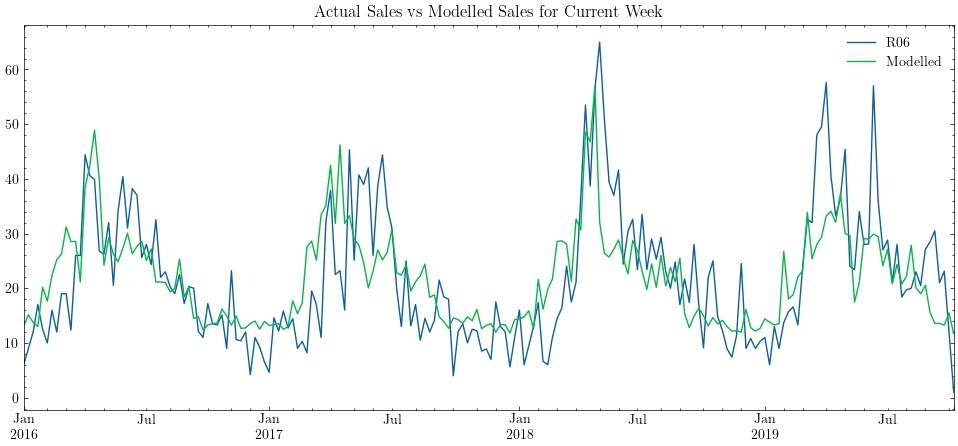

<IPython.core.display.Javascript object>

In [121]:
plt.figure(figsize=(12, 5))
subset_1["R06"].plot()
subset_1["Modelled"].plot()
plt.title("Actual Sales vs Modelled Sales for Current Week")
plt.legend()

Text(0.5, 1.0, 'Regression Model for Current Week Sales')

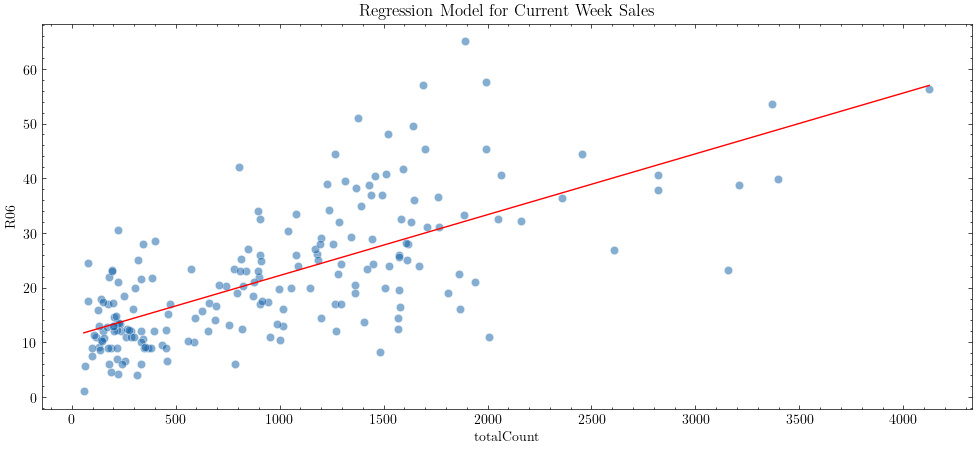

<IPython.core.display.Javascript object>

In [122]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=subset_1, x="totalCount", y="R06", alpha=0.5)
sns.lineplot(subset_1, x="totalCount", y="Modelled", color="Red")
plt.title("Regression Model for Current Week Sales")

In [123]:
display(subset_1.corr(method="spearman"))

totalCount       R06  Modelled
totalCount    1.000000  0.691549  1.000000
R06           0.691549  1.000000  0.691549
Modelled      1.000000  0.691549  1.000000

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Model Error')

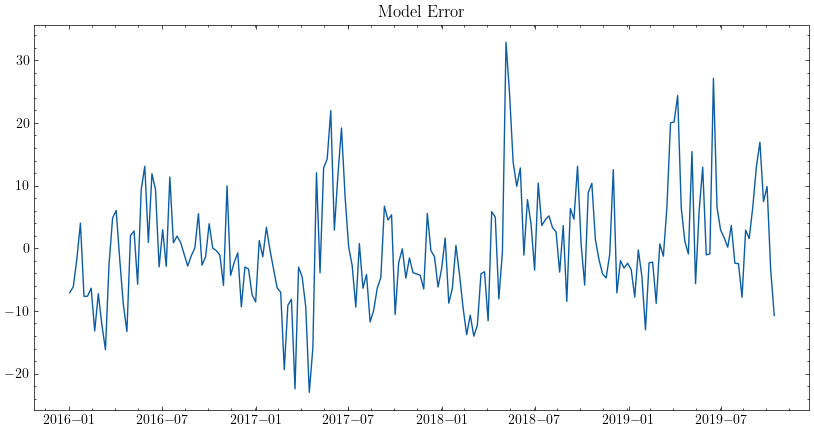

<IPython.core.display.Javascript object>

In [124]:
plt.figure(figsize=(10, 5))
plt.plot(subset_1["R06"] - subset_1["Modelled"])
plt.title("Model Error")

In [125]:
"%.2f" % results.f_pvalue

'0.00'

<IPython.core.display.Javascript object>

In [126]:
mean_absolute_error(subset_1["R06"], subset_1["Modelled"])

6.62826091744901

<IPython.core.display.Javascript object>

In [127]:
subset_1["R06"].mean()

21.83989898989899

<IPython.core.display.Javascript object>

In [128]:
(100 - mean_absolute_percentage_error(subset_1["R06"], subset_1["Modelled"]) * 100)

55.590914624310145

<IPython.core.display.Javascript object>

## Takeaways
1. Model has significant improvements compared to daily
2. R2 Score increases to 48%
3. The difference between MAE and Mean is significantly reduced
4. MAPE increases to 56%

Overall improvement over daily model

<div style="page-break-after: always"></div>

# Modeling Monthly Sales using Current Month's Pollen

In [129]:
subset_1 = subset_monthly.copy()
subset_1.head()

R06  treeCount  grassCount  weedCount  totalCount
2016-01-31   56.50       1775           0          0        1775
2016-02-29   58.00       4566           0          0        4566
2016-03-31   97.84       7042           0          0        7042
2016-04-30  162.40      10829           0          0       10829
2016-05-31  137.10       5180         891        341        6412

<IPython.core.display.Javascript object>

In [130]:
subset_1 = subset_1.dropna()
subset_1 = subset_1[["totalCount", "R06"]]
subset_1

totalCount     R06
2016-01-31        1775   56.50
2016-02-29        4566   58.00
2016-03-31        7042   97.84
2016-04-30       10829  162.40
2016-05-31        6412  137.10
2016-06-30        6101  134.80
2016-07-31        4838  116.83
2016-08-31        3826   85.30
2016-09-30        1357   69.30
2016-10-31        1366   60.90
2016-11-30         882   51.20
2016-12-31         947   34.90
2017-01-31         819   61.75
2017-02-28        3451   38.10
2017-03-31        8456  100.10
2017-04-30        9748  122.40
2017-05-31        5631  161.81
2017-06-30        6028  151.90
2017-07-31        4540   81.10
2017-08-31        4007   60.10
2017-09-30        1306   66.90
2017-10-31        1285   51.00
2017-11-30         957   46.60
2017-12-31         789   47.10
2018-01-31        1429   49.50
2018-02-28        3448   39.06
2018-03-31        6781   85.50
2018-04-30       13019  197.10
2018-05-31        6376  213.04
2018-06-30        6010  120.80
2018-07-31        4441  122.20
2018-08-31        4807  103.10
2018-09-30        1721   88.10
2018-10-31        1196   76.90
2018-11-30         584   48.40
2018-12-31         895   53.10
2019-01-31        1209   41.30
2019-02-28        3754   69.50
2019-03-31        7256  169.50
2019-04-30        8768  179.10
2019-05-31        5574  135.40
2019-06-30        6530  156.04
2019-07-31        4709  105.20
2019-08-31        4465   97.30
2019-09-30        1147  109.10
2019-10-31         427   11.13

<IPython.core.display.Javascript object>

In [131]:
model_daily = sm.OLS(
    subset_1["R06"],
    sm.add_constant(subset_1["totalCount"]),
    missing="drop",
)
results = model_daily.fit()
results_summary = results.summary()

<IPython.core.display.Javascript object>

In [132]:
results_as_html = results_summary.tables[0].as_html()
summary = pd.read_html(results_as_html)[0]
summary.columns = ["OLS Results Summary", " ", "  ", "   "]
display(summary)

OLS Results Summary                                                     
0      Dep. Variable:               R06           R-squared:  6.360000e-01
1              Model:               OLS      Adj. R-squared:  6.270000e-01
2             Method:     Least Squares         F-statistic:  7.675000e+01
3               Date:  Fri, 03 Feb 2023  Prob (F-statistic):  3.350000e-11
4               Time:          00:15:52      Log-Likelihood: -2.198000e+02
5   No. Observations:                46                 AIC:  4.436000e+02
6       Df Residuals:                44                 BIC:  4.473000e+02
7           Df Model:                 1                  NaN           NaN
8    Covariance Type:         nonrobust                  NaN           NaN

<IPython.core.display.Javascript object>

In [196]:
6.360000e-01

0.636

<IPython.core.display.Javascript object>

In [133]:
results_as_html = results_summary.tables[1].as_html()
summary = pd.read_html(results_as_html, header=0, index_col=0)[0]
display(summary)

coef  std err      t  P>|t|  [0.025  0.975]
const       41.7133    7.379  5.653    0.0  26.843  56.584
totalCount   0.0126    0.001  8.761    0.0   0.010   0.015

<IPython.core.display.Javascript object>

In [134]:
results_as_html = results_summary.tables[2].as_html()
summary = pd.read_html(results_as_html, header=0, index_col=0)[0]
display(summary)

4.255     Durbin-Watson:     1.522
Omnibus:                                          
Prob(Omnibus):  0.119  Jarque-Bera (JB):     3.067
Skew:           0.522          Prob(JB):     0.216
Kurtosis:       3.713          Cond. No.  8750.000

<IPython.core.display.Javascript object>

In [135]:
pred = results.predict(sm.add_constant(subset_1["totalCount"]))
subset_1["Modelled"] = pred

<IPython.core.display.Javascript object>

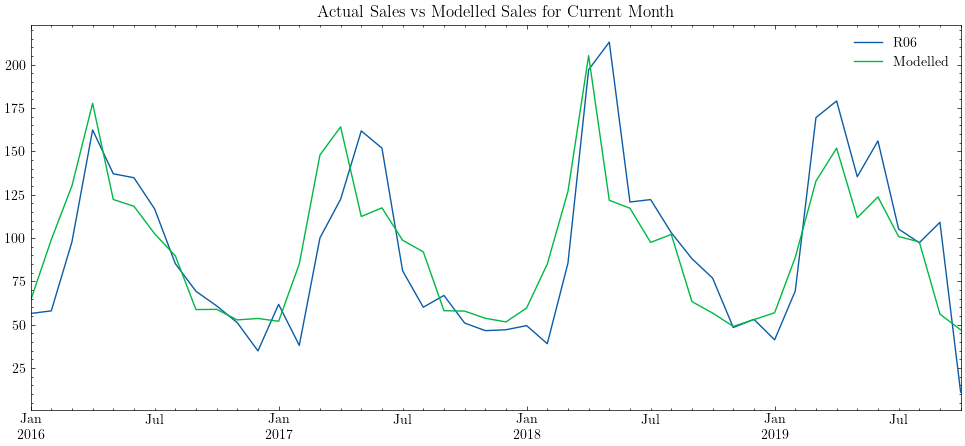

<IPython.core.display.Javascript object>

In [136]:
plt.figure(figsize=(12, 5))
subset_1["R06"].plot()
subset_1["Modelled"].plot()
plt.title("Actual Sales vs Modelled Sales for Current Month")
plt.legend()

Text(0.5, 1.0, 'Regression Model for Current Month Sales')

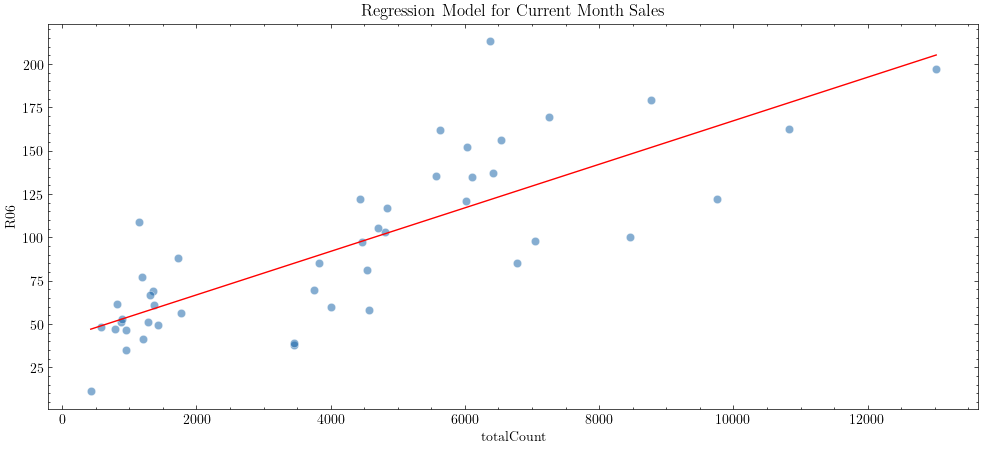

<IPython.core.display.Javascript object>

In [137]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=subset_1, x="totalCount", y="R06", alpha=0.5)
sns.lineplot(subset_1, x="totalCount", y="Modelled", color="Red")
plt.title("Regression Model for Current Month Sales")

In [138]:
display(subset_1.corr(method="spearman"))

totalCount       R06  Modelled
totalCount    1.000000  0.817206  1.000000
R06           0.817206  1.000000  0.817206
Modelled      1.000000  0.817206  1.000000

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Model Error')

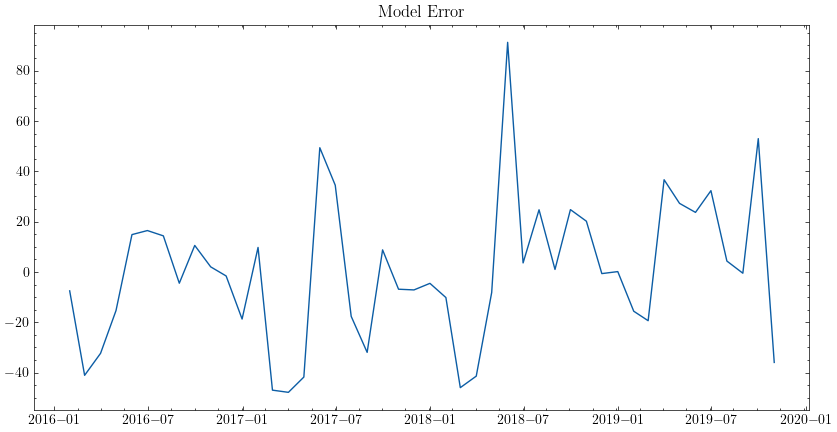

<IPython.core.display.Javascript object>

In [139]:
plt.figure(figsize=(10, 5))
plt.plot(subset_1["R06"] - subset_1["Modelled"])
plt.title("Model Error")

In [140]:
"%.2f" % results.f_pvalue

'0.00'

<IPython.core.display.Javascript object>

In [141]:
mae = mean_absolute_error(subset_1["R06"], subset_1["Modelled"])
mae

21.88624704580777

<IPython.core.display.Javascript object>

In [142]:
mean = subset_1["R06"].mean()
mean

94.00652173913046

<IPython.core.display.Javascript object>

In [143]:
(100 - mean_absolute_percentage_error(subset_1["R06"], subset_1["Modelled"]) * 100)

67.96872195231308

<IPython.core.display.Javascript object>

## Takeaways

1. Improvement over weekly model
2. R2 Score increases to a good score of 64%
3. The gap between MAE and mean of sales significantly improves
4. We got 100-MAPE of 68%

(More on other stats later)

<div style="page-break-after: always"></div>

# Modeling Next Day Sales

In [144]:
subset_1_day_shifted = subset.copy()
# subset_1_day_shifted["R06"] = subset_1_day_shifted["R06"].shift(-1)
subset_1_day_shifted["totalCount"] = subset_1_day_shifted["totalCount"].shift(1)
subset_1_day_shifted.head()

R06  treeCount  grassCount  weedCount  totalCount
2016-01-01  0.0          2           0          0         NaN
2016-01-02  5.0         19           0          0         2.0
2016-01-03  1.0        158           0          0        19.0
2016-01-04  1.0         30           0          0       158.0
2016-01-05  1.0         41           0          0        30.0

<IPython.core.display.Javascript object>

In [145]:
subset.head()

R06  treeCount  grassCount  weedCount  totalCount
2016-01-01  0.0          2           0          0           2
2016-01-02  5.0         19           0          0          19
2016-01-03  1.0        158           0          0         158
2016-01-04  1.0         30           0          0          30
2016-01-05  1.0         41           0          0          41

<IPython.core.display.Javascript object>

In [146]:
subset_1_day_shifted = subset_1_day_shifted.dropna()
subset_1_day_shifted = subset_1_day_shifted[["totalCount", "R06"]]
subset_1_day_shifted

totalCount   R06
2016-01-02         2.0  5.00
2016-01-03        19.0  1.00
2016-01-04       158.0  1.00
2016-01-05        30.0  1.00
2016-01-06        41.0  2.00
...                ...   ...
2019-10-04        16.0  1.00
2019-10-05        15.0  0.33
2019-10-06        77.0  4.20
2019-10-07         0.0  1.00
2019-10-08        26.0  0.00

[1376 rows x 2 columns]

<IPython.core.display.Javascript object>

In [147]:
import statsmodels.api as sm

model_daily = sm.OLS(
    subset_1_day_shifted["R06"],
    sm.add_constant(subset_1_day_shifted["totalCount"]),
    missing="drop",
)
results = model_daily.fit()
results_summary = results.summary()

<IPython.core.display.Javascript object>

In [148]:
results_as_html = results_summary.tables[0].as_html()
summary = pd.read_html(results_as_html)[0]
summary.columns = ["OLS Results Summary", " ", "  ", "   "]
display(summary)

OLS Results Summary                                                     
0      Dep. Variable:               R06           R-squared:  1.580000e-01
1              Model:               OLS      Adj. R-squared:  1.570000e-01
2             Method:     Least Squares         F-statistic:  2.577000e+02
3               Date:  Fri, 03 Feb 2023  Prob (F-statistic):  2.820000e-53
4               Time:          00:15:55      Log-Likelihood: -3.111100e+03
5   No. Observations:              1376                 AIC:  6.226000e+03
6       Df Residuals:              1374                 BIC:  6.237000e+03
7           Df Model:                 1                  NaN           NaN
8    Covariance Type:         nonrobust                  NaN           NaN

<IPython.core.display.Javascript object>

In [149]:
results_as_html = results_summary.tables[1].as_html()
summary = pd.read_html(results_as_html, header=0, index_col=0)[0]
display(summary)

coef  std err       t  P>|t|  [0.025  0.975]
const       2.0774    0.091  22.769    0.0   1.898   2.256
totalCount  0.0077    0.000  16.052    0.0   0.007   0.009

<IPython.core.display.Javascript object>

In [150]:
results_as_html = results_summary.tables[2].as_html()
summary = pd.read_html(results_as_html)[0]
summary.columns = ["OLS Summary 3", " ", "  ", "   "]
display(summary)

OLS Summary 3                                           
0        Omnibus:  245.697     Durbin-Watson:   1.597000e+00
1  Prob(Omnibus):    0.000  Jarque-Bera (JB):   4.796920e+02
2           Skew:    1.058          Prob(JB):  6.860000e-105
3       Kurtosis:    4.972          Cond. No.   2.790000e+02

<IPython.core.display.Javascript object>

In [151]:
pred = results.predict(sm.add_constant(subset_1_day_shifted["totalCount"]))
subset_1_day_shifted["Modelled"] = pred

<IPython.core.display.Javascript object>

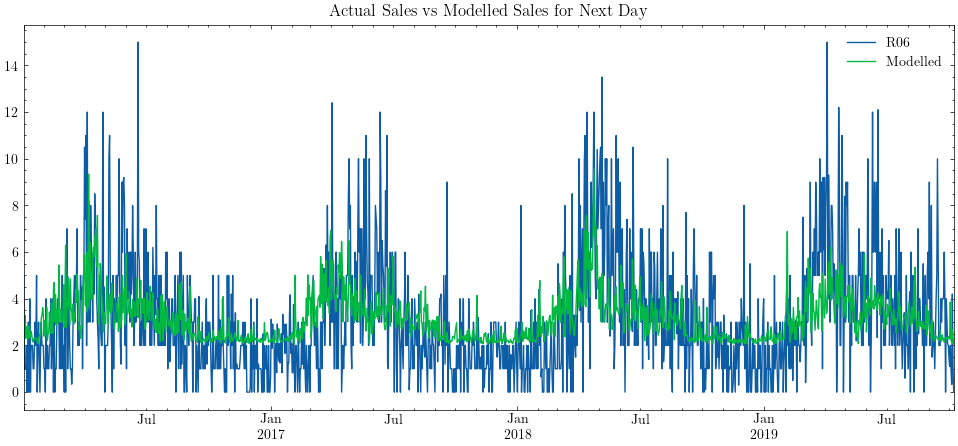

<IPython.core.display.Javascript object>

In [152]:
plt.figure(figsize=(12, 5))
subset_1_day_shifted["R06"].plot()
subset_1_day_shifted["Modelled"].plot()
plt.title("Actual Sales vs Modelled Sales for Next Day")
plt.legend()

Text(0.5, 1.0, 'Regression Model for Next Day Sales')

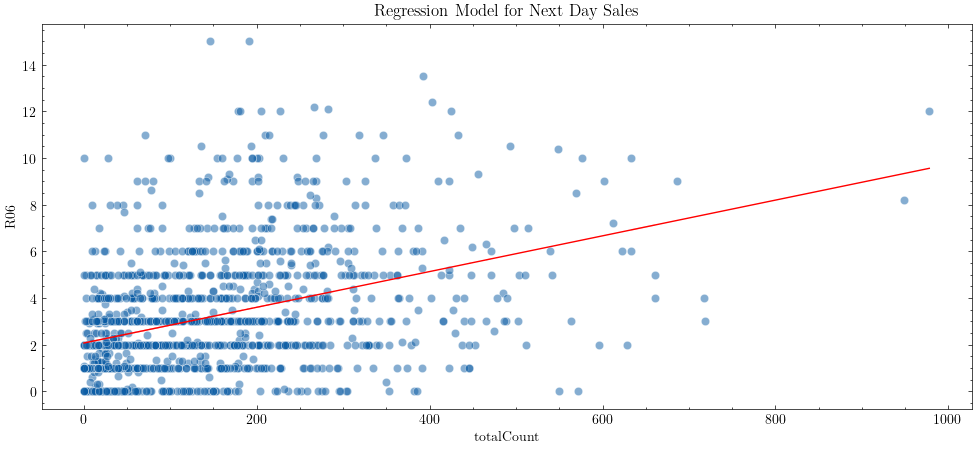

<IPython.core.display.Javascript object>

In [153]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=subset_1_day_shifted, x="totalCount", y="R06", alpha=0.5)
sns.lineplot(subset_1_day_shifted, x="totalCount", y="Modelled", color="Red")
plt.title("Regression Model for Next Day Sales")

In [154]:
display(subset_1_day_shifted.corr(method="spearman"))

totalCount       R06  Modelled
totalCount    1.000000  0.410885  1.000000
R06           0.410885  1.000000  0.410885
Modelled      1.000000  0.410885  1.000000

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Model Error')

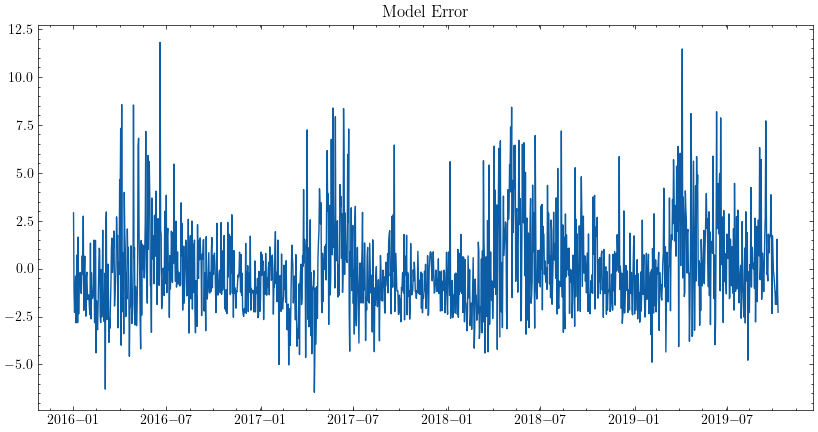

<IPython.core.display.Javascript object>

In [155]:
plt.figure(figsize=(10, 5))
plt.plot(subset_1_day_shifted["R06"] - subset_1_day_shifted["Modelled"])
plt.title("Model Error")

In [156]:
"%.2f" % results.f_pvalue

'0.00'

<IPython.core.display.Javascript object>

In [157]:
mean_absolute_error(subset_1_day_shifted["R06"], subset_1_day_shifted["Modelled"])

1.747247744832179

<IPython.core.display.Javascript object>

In [158]:
subset_1_day_shifted["R06"].mean()

3.1426598837209303

<IPython.core.display.Javascript object>

In [159]:
subset_1_day_shifted = subset_1_day_shifted[subset_1_day_shifted["R06"] != 0]

<IPython.core.display.Javascript object>

In [160]:
(
    100
    - mean_absolute_percentage_error(
        subset_1_day_shifted["R06"], subset_1_day_shifted["Modelled"]
    )
    * 100
)

28.202774457466916

<IPython.core.display.Javascript object>

## Takeaways

1. Not much difference from current day model
2. Metrics similar or slightly worse

<div style="page-break-after: always"></div>

# Modeling Next Week's Sales Using Current Week's Pollen

In [161]:
subset_1_week_shifted = subset_weekly.copy()
# subset_1_week_shifted["R06"] = subset_1_week_shifted["R06"].shift(-1)
subset_1_week_shifted["totalCount"] = subset_1_week_shifted["totalCount"].shift(1)
subset_1_week_shifted.head()

R06  treeCount  grassCount  weedCount  totalCount
2016-01-03   6.0        179           0          0         NaN
2016-01-10   9.0        367           0          0       179.0
2016-01-17  12.0        239           0          0       367.0
2016-01-24  17.0        172           0          0       239.0
2016-01-31  12.5        818           0          0       172.0

<IPython.core.display.Javascript object>

In [162]:
subset_weekly.head()

R06  treeCount  grassCount  weedCount  totalCount
2016-01-03   6.0        179           0          0         179
2016-01-10   9.0        367           0          0         367
2016-01-17  12.0        239           0          0         239
2016-01-24  17.0        172           0          0         172
2016-01-31  12.5        818           0          0         818

<IPython.core.display.Javascript object>

In [163]:
subset_1_week_shifted = subset_1_week_shifted.dropna()
subset_1_week_shifted = subset_1_week_shifted[["totalCount", "R06"]]
subset_1_week_shifted

totalCount    R06
2016-01-10       179.0   9.00
2016-01-17       367.0  12.00
2016-01-24       239.0  17.00
2016-01-31       172.0  12.50
2016-02-07       818.0  10.00
...                ...    ...
2019-09-15       400.0  30.50
2019-09-22       223.0  21.00
2019-09-29       222.0  23.10
2019-10-06       195.0  12.13
2019-10-13       396.0   1.00

[197 rows x 2 columns]

<IPython.core.display.Javascript object>

In [164]:
import statsmodels.api as sm

model_daily = sm.OLS(
    subset_1_week_shifted["R06"],
    sm.add_constant(subset_1_week_shifted["totalCount"]),
    missing="drop",
)
results = model_daily.fit()
results_summary = results.summary()

<IPython.core.display.Javascript object>

In [165]:
results_as_html = results_summary.tables[0].as_html()
summary = pd.read_html(results_as_html)[0]
summary.columns = ["OLS Results Summary", " ", "  ", "   "]
display(summary)

OLS Results Summary                                                     
0      Dep. Variable:               R06           R-squared:  4.600000e-01
1              Model:               OLS      Adj. R-squared:  4.570000e-01
2             Method:     Least Squares         F-statistic:  1.662000e+02
3               Date:  Fri, 03 Feb 2023  Prob (F-statistic):  6.680000e-28
4               Time:          00:16:00      Log-Likelihood: -7.106700e+02
5   No. Observations:               197                 AIC:  1.425000e+03
6       Df Residuals:               195                 BIC:  1.432000e+03
7           Df Model:                 1                  NaN           NaN
8    Covariance Type:         nonrobust                  NaN           NaN

<IPython.core.display.Javascript object>

In [166]:
results_as_html = results_summary.tables[1].as_html()
summary = pd.read_html(results_as_html, header=0, index_col=0)[0]
display(summary)

coef  std err       t  P>|t|  [0.025  0.975]
const       11.3319    1.041  10.889    0.0   9.279  13.384
totalCount   0.0109    0.001  12.890    0.0   0.009   0.013

<IPython.core.display.Javascript object>

In [167]:
results_as_html = results_summary.tables[2].as_html()
summary = pd.read_html(results_as_html)[0]
summary.columns = ["OLS Summary 3", " ", "  ", "   "]
display(summary)

OLS Summary 3                                        
0        Omnibus:  12.351     Durbin-Watson:     1.337000
1  Prob(Omnibus):   0.002  Jarque-Bera (JB):    15.159000
2           Skew:   0.461          Prob(JB):     0.000511
3       Kurtosis:   3.999          Cond. No.  2010.000000

<IPython.core.display.Javascript object>

In [168]:
pred = results.predict(sm.add_constant(subset_1_week_shifted["totalCount"]))
subset_1_week_shifted["Modelled"] = pred

<IPython.core.display.Javascript object>

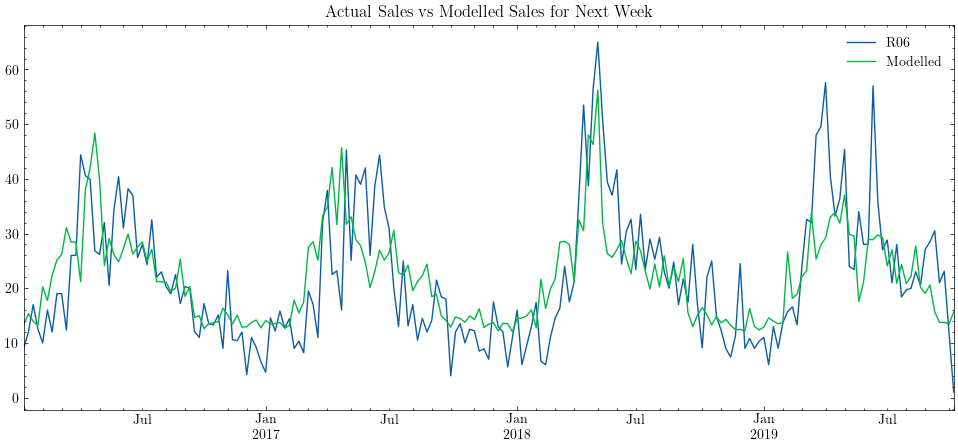

<IPython.core.display.Javascript object>

In [169]:
plt.figure(figsize=(12, 5))
subset_1_week_shifted["R06"].plot()
subset_1_week_shifted["Modelled"].plot()
plt.title("Actual Sales vs Modelled Sales for Next Week")
plt.legend()

Text(0.5, 1.0, 'Regression Model for Next Week Sales')

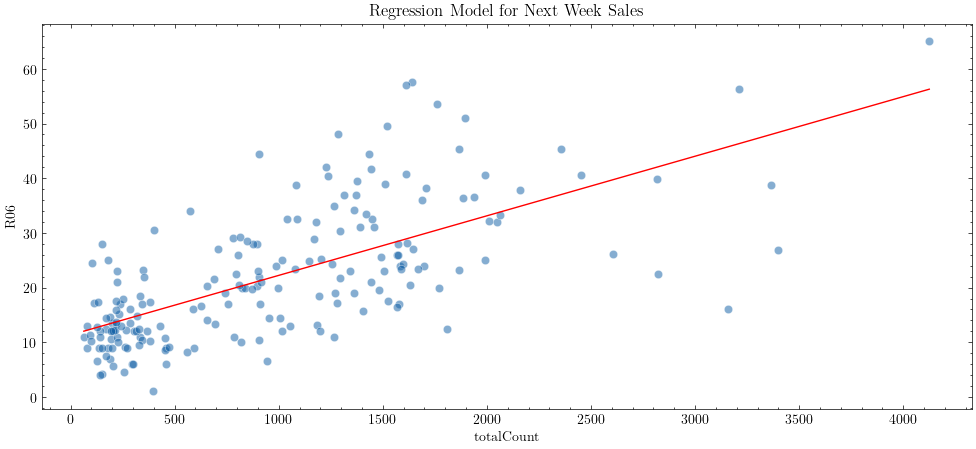

<IPython.core.display.Javascript object>

In [170]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=subset_1_week_shifted, x="totalCount", y="R06", alpha=0.5)
sns.lineplot(subset_1_week_shifted, x="totalCount", y="Modelled", color="Red")
plt.title("Regression Model for Next Week Sales")

In [171]:
display(subset_1_week_shifted.corr(method="spearman"))

totalCount       R06  Modelled
totalCount    1.000000  0.699751  1.000000
R06           0.699751  1.000000  0.699751
Modelled      1.000000  0.699751  1.000000

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Model Error')

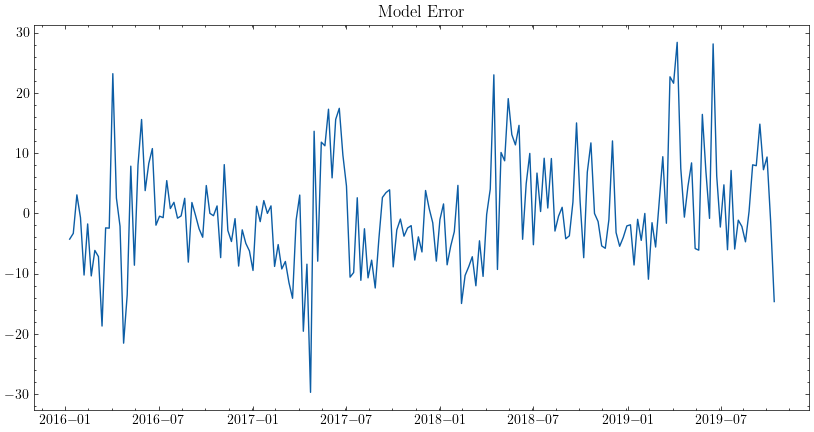

<IPython.core.display.Javascript object>

In [172]:
plt.figure(figsize=(10, 5))
plt.plot(subset_1_week_shifted["R06"] - subset_1_week_shifted["Modelled"])
plt.title("Model Error")

In [173]:
"%.2f" % results.f_pvalue

'0.00'

<IPython.core.display.Javascript object>

In [174]:
mean_absolute_error(subset_1_week_shifted["R06"], subset_1_week_shifted["Modelled"])

6.741360844386589

<IPython.core.display.Javascript object>

In [175]:
subset_1_week_shifted["R06"].mean()

21.92030456852792

<IPython.core.display.Javascript object>

In [176]:
(
    100
    - mean_absolute_percentage_error(
        subset_1_week_shifted["R06"], subset_1_week_shifted["Modelled"]
    )
    * 100
)

54.315223049501085

<IPython.core.display.Javascript object>

## Takeaways
1. Similar to current week model
2. Similar metrics, slightly worse

Overall improvement over daily model

<div style="page-break-after: always"></div>

# Modeling Next Month's Sales using Current Month's Pollen

In [177]:
subset_1_month_shifted = subset_monthly.copy()
# subset_1_month_shifted["R06"] = subset_1_month_shifted["R06"].shift(-1)
subset_1_month_shifted["totalCount"] = subset_1_month_shifted["totalCount"].shift(1)
subset_1_month_shifted.head()

R06  treeCount  grassCount  weedCount  totalCount
2016-01-31   56.50       1775           0          0         NaN
2016-02-29   58.00       4566           0          0      1775.0
2016-03-31   97.84       7042           0          0      4566.0
2016-04-30  162.40      10829           0          0      7042.0
2016-05-31  137.10       5180         891        341     10829.0

<IPython.core.display.Javascript object>

In [178]:
subset_monthly.head()

R06  treeCount  grassCount  weedCount  totalCount
2016-01-31   56.50       1775           0          0        1775
2016-02-29   58.00       4566           0          0        4566
2016-03-31   97.84       7042           0          0        7042
2016-04-30  162.40      10829           0          0       10829
2016-05-31  137.10       5180         891        341        6412

<IPython.core.display.Javascript object>

In [179]:
subset_1_month_shifted = subset_1_month_shifted.dropna()
subset_1_month_shifted = subset_1_month_shifted[["totalCount", "R06"]]
subset_1_month_shifted

totalCount     R06
2016-02-29      1775.0   58.00
2016-03-31      4566.0   97.84
2016-04-30      7042.0  162.40
2016-05-31     10829.0  137.10
2016-06-30      6412.0  134.80
2016-07-31      6101.0  116.83
2016-08-31      4838.0   85.30
2016-09-30      3826.0   69.30
2016-10-31      1357.0   60.90
2016-11-30      1366.0   51.20
2016-12-31       882.0   34.90
2017-01-31       947.0   61.75
2017-02-28       819.0   38.10
2017-03-31      3451.0  100.10
2017-04-30      8456.0  122.40
2017-05-31      9748.0  161.81
2017-06-30      5631.0  151.90
2017-07-31      6028.0   81.10
2017-08-31      4540.0   60.10
2017-09-30      4007.0   66.90
2017-10-31      1306.0   51.00
2017-11-30      1285.0   46.60
2017-12-31       957.0   47.10
2018-01-31       789.0   49.50
2018-02-28      1429.0   39.06
2018-03-31      3448.0   85.50
2018-04-30      6781.0  197.10
2018-05-31     13019.0  213.04
2018-06-30      6376.0  120.80
2018-07-31      6010.0  122.20
2018-08-31      4441.0  103.10
2018-09-30      4807.0   88.10
2018-10-31      1721.0   76.90
2018-11-30      1196.0   48.40
2018-12-31       584.0   53.10
2019-01-31       895.0   41.30
2019-02-28      1209.0   69.50
2019-03-31      3754.0  169.50
2019-04-30      7256.0  179.10
2019-05-31      8768.0  135.40
2019-06-30      5574.0  156.04
2019-07-31      6530.0  105.20
2019-08-31      4709.0   97.30
2019-09-30      4465.0  109.10
2019-10-31      1147.0   11.13

<IPython.core.display.Javascript object>

In [180]:
model_daily = sm.OLS(
    subset_1_month_shifted["R06"],
    sm.add_constant(subset_1_month_shifted["totalCount"]),
    missing="drop",
)
results = model_daily.fit()
results_summary = results.summary()

<IPython.core.display.Javascript object>

In [181]:
results_as_html = results_summary.tables[0].as_html()
summary = pd.read_html(results_as_html)[0]
summary.columns = ["OLS Results Summary", " ", "  ", "   "]
display(summary)

OLS Results Summary                                                     
0      Dep. Variable:               R06           R-squared:  7.120000e-01
1              Model:               OLS      Adj. R-squared:  7.060000e-01
2             Method:     Least Squares         F-statistic:  1.064000e+02
3               Date:  Fri, 03 Feb 2023  Prob (F-statistic):  3.320000e-13
4               Time:          00:16:03      Log-Likelihood: -2.099000e+02
5   No. Observations:                45                 AIC:  4.238000e+02
6       Df Residuals:                43                 BIC:  4.274000e+02
7           Df Model:                 1                  NaN           NaN
8    Covariance Type:         nonrobust                  NaN           NaN

<IPython.core.display.Javascript object>

In [182]:
results_as_html = results_summary.tables[1].as_html()
summary = pd.read_html(results_as_html, header=0, index_col=0)[0]
display(summary)

coef  std err       t  P>|t|  [0.025  0.975]
const       37.7949    6.775   5.579    0.0  24.132  51.458
totalCount   0.0134    0.001  10.317    0.0   0.011   0.016

<IPython.core.display.Javascript object>

In [183]:
results_as_html = results_summary.tables[2].as_html()
summary = pd.read_html(results_as_html)[0]
summary.columns = ["OLS Summary 3", " ", "  ", "   "]
display(summary)

OLS Summary 3                                       
0        Omnibus:  11.602     Durbin-Watson:     1.95800
1  Prob(Omnibus):   0.003  Jarque-Bera (JB):    11.99300
2           Skew:   0.987          Prob(JB):     0.00249
3       Kurtosis:   4.581          Cond. No.  9000.00000

<IPython.core.display.Javascript object>

In [184]:
pred = results.predict(sm.add_constant(subset_1_month_shifted["totalCount"]))
subset_1_month_shifted["Modelled"] = pred

<IPython.core.display.Javascript object>

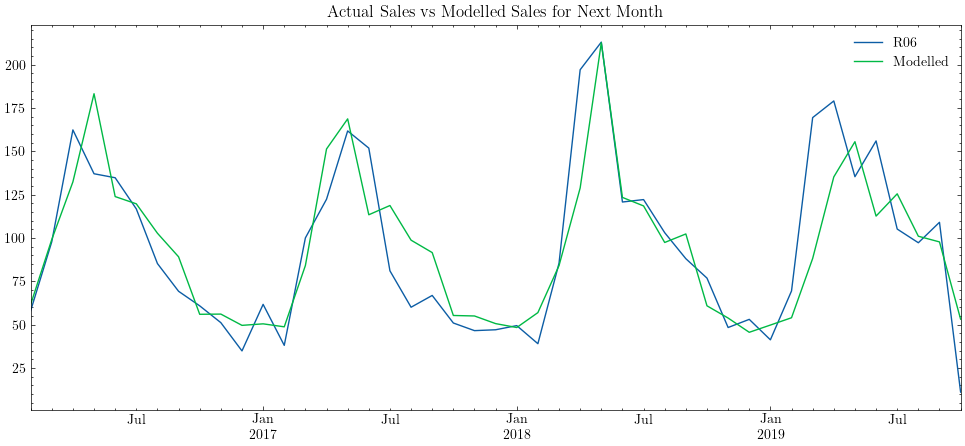

<IPython.core.display.Javascript object>

In [185]:
plt.figure(figsize=(12, 5))
subset_1_month_shifted["R06"].plot()
subset_1_month_shifted["Modelled"].plot()
plt.title("Actual Sales vs Modelled Sales for Next Month")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


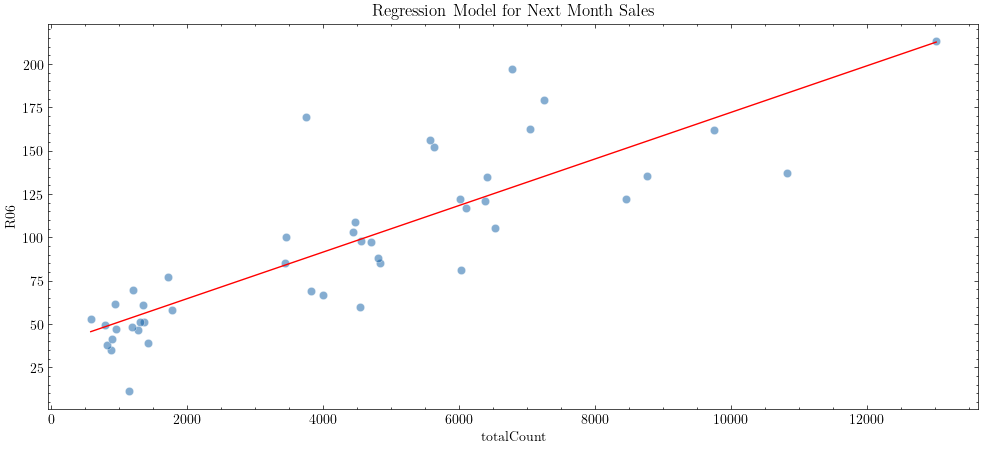

<IPython.core.display.Javascript object>

In [186]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=subset_1_month_shifted, x="totalCount", y="R06", alpha=0.5)
sns.lineplot(subset_1_month_shifted, x="totalCount", y="Modelled", color="Red")
plt.title("Regression Model for Next Month Sales")
plt.legend()

In [187]:
display(subset_1_month_shifted.corr(method="spearman"))

totalCount       R06  Modelled
totalCount    1.000000  0.867721  1.000000
R06           0.867721  1.000000  0.867721
Modelled      1.000000  0.867721  1.000000

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Model Error')

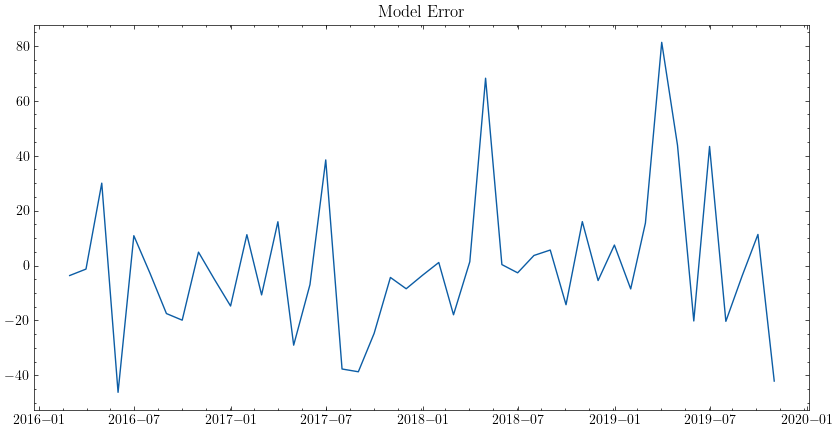

<IPython.core.display.Javascript object>

In [188]:
plt.figure(figsize=(10, 5))
plt.plot(subset_1_month_shifted["R06"] - subset_1_month_shifted["Modelled"])
plt.title("Model Error")

In [189]:
"%.2f" % results.f_pvalue

'0.00'

<IPython.core.display.Javascript object>

In [190]:
mae = mean_absolute_error(
    subset_1_month_shifted["R06"], subset_1_month_shifted["Modelled"]
)
mae

18.239591885639634

<IPython.core.display.Javascript object>

In [191]:
mean = subset_1_month_shifted["R06"].mean()
mean

94.84

<IPython.core.display.Javascript object>

In [192]:
(
    100
    - mean_absolute_percentage_error(
        subset_1_month_shifted["R06"], subset_1_month_shifted["Modelled"]
    )
    * 100
)

73.24384669822723

<IPython.core.display.Javascript object>

## Takeaways

1. Improvement over current month model
2. R2 Score increases to a very good score of 71%
3. The gap between MAE and mean of sales further reduces
4. We got 100-MAPE of 73%, 5% improvement over current month
5. Statistically significant F scores for all

(More on other stats later)

<div style="page-break-after: always"></div>

In [193]:
1.570000e-01

0.157

<IPython.core.display.Javascript object>